# HARSH SHARMA

---

### STATS AND PUBLIC HEALTH PART 2

---

__It is highly recommended to follow this notebook from the starting, because modification of data frames happens at several steps of the notebook. Skipping the contents will either change the result or will not work certain functions. thanks__

#### TABLE OF CONTENTS

[__Part 1 - Basic Analysis__](#part1)<br>
      [Question 1](#Que1.1)<br>
      [Question 2](#Que1.2)<br>
[__Part 2 - Statistical Analysis__](#part2)<br>
    [Question 1](#Que2.1)<br>
    [Question 2](#Que2.2)<br>
[__Part 3 - Advanced Statistical Analysis__](#part3)<br>
    [Question 1](#Que3.1)<br>
    [Question 2](#Que3.2)<br>

---

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
%matplotlib inline

In [45]:
plt.rcParams['figure.figsize'] = (5.0, 3.0) #setting figure size in general for the graph I'm using for my visualisation

Below is the familirisation with the available dataframe.

In [444]:
stat_df = pd.read_csv('mosquito_data_part_2.csv')
stat_df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


Let's get some information of the given dataset.

In [445]:
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


Earlier we can see that we had 18,495 rows of that and same is the number with every column as can be seen from above. And luckily we have no null values in the datset.

As far as the datatype is concerned of each column, 6 columns have categorical or string data (object) in them and other 6 have numeric data (int and float).

NOTE: Here Date has a object data type which we should change it to datetime type I think I'm gonna drop it as I don't need it.

Let's see how much duplications do we have in the mosquito dataset

In [446]:
stat_df.duplicated().sum()

658

From above we can see that we have 658 rows duplicated. Let's drop them before doing anything.

Lets check for the rows which have mosquito number equal to 50.

In [451]:
## pulling rows where mosquito number is equal to 50
max_df = stat_df.loc[stat_df['Mosquito number'] == 50]
len(max_df)

647

There are 647 out of total rows in the dataframe which have mosquito number equal to 50. It is not NECESSARY that all 647 of them would be duplicates. This is because there may be cases where exact 50 mosquitoes were found, not even one more than that.

Therefore, in these cases it would not be appropraiate to say that all 647 are duplicated.

Let's check the rows which have mosquito number equal to 50 in the duplicated dataset.

In [454]:
df_of_dup = stat_df[stat_df.duplicated(keep=False)]
len(df_of_dup)

862

862/2=431 < 658 shows that there are some rows which have more than one replica of them. We need to figure out those 

In [8]:
# check duplicated rows with mosquito number equal to 50
fifty_df = df_of_dup.loc[df_of_dup['Mosquito number'] == 50]
len(fifty_df)

100

There's no point of doing all this. It is already a cleaned data as mentioned in the deliverable and the whatever duplicates are shown in the data should be added in terms of mosquito numbers.

I concluded above as this beacause cleaning the duplicated rows will eliminate the samples which have mosquito number greater than 100.

So let's NOT drop any of the duplicate rows, instead add them!! This is the best way according to me.

In [456]:
## grouping by every column in the dataset except Mosquito number

stat_df = stat_df.groupby(['Year', 'Week', 'Trap', 'Trap type', 'Date', 'WNV Present'
                       , 'Species', 'Lat', 'Lon', 'Address Block', 'Month'], as_index=False).sum()
stat_df.head()

,Year,Week,Trap,Trap type,Date,WNV Present,Species,Lat,Lon,Address Block,Month,Mosquito number
0,2007,21,T002,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.956299,-87.797517,41XX N OAK PARK AVE,5,1
1,2007,21,T007,CDC,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.995492,-87.769609,62XX N MANDELL AVE,5,1
2,2007,21,T015,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.974183,-87.825241,79XX W FOSTER AVE,5,4
3,2007,21,T045,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.921705,-87.666963,15XX W WEBSTER AVE,5,2
4,2007,21,T046,CDC,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.892220,-87.691698,25XX W GRAND AVE,5,1


In [460]:
# Sanity check
stat_df.duplicated().sum()

0

Now let's check on the column level. For this I have to first take the transpose of the existing dataset and then drop the duplicate columns.

In [461]:
# duplicacy for columns
stat_df.T.duplicated().sum()

0

From above, we see that we have no duplicate columns in the dataset. But we can still see if any one of those, basically have the same information!!!!

In [462]:
#lets do it
stat_df.head()

,Year,Week,Trap,Trap type,Date,WNV Present,Species,Lat,Lon,Address Block,Month,Mosquito number
0,2007,21,T002,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.956299,-87.797517,41XX N OAK PARK AVE,5,1
1,2007,21,T007,CDC,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.995492,-87.769609,62XX N MANDELL AVE,5,1
2,2007,21,T015,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.974183,-87.825241,79XX W FOSTER AVE,5,4
3,2007,21,T045,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.921705,-87.666963,15XX W WEBSTER AVE,5,2
4,2007,21,T046,CDC,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.892220,-87.691698,25XX W GRAND AVE,5,1


Seems like, year, week and month are all available in the Date column, so we can drop the Date column and keep Year, Week and Month column.

Lets see what are our demands for the analysis and then we'll drop accordingly.

---

---

---

## Part 1 - Basic Analysis
<a class ='anchor' id = 'part1' ></a>

### Question 1: Convert the WNV Present column into a binary column and create dummy variables from the Trap type column.
<a class ='anchor' id = 'Que1.1' ></a>

In [463]:
stat_df.head()

,Year,Week,Trap,Trap type,Date,WNV Present,Species,Lat,Lon,Address Block,Month,Mosquito number
0,2007,21,T002,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.956299,-87.797517,41XX N OAK PARK AVE,5,1
1,2007,21,T007,CDC,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.995492,-87.769609,62XX N MANDELL AVE,5,1
2,2007,21,T015,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.974183,-87.825241,79XX W FOSTER AVE,5,4
3,2007,21,T045,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.921705,-87.666963,15XX W WEBSTER AVE,5,2
4,2007,21,T046,CDC,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.892220,-87.691698,25XX W GRAND AVE,5,1


In [464]:
stat_df['WNV Present'] = np.where(stat_df['WNV Present'] == 'positive', 1, 0)

In [465]:
# Check
stat_df['WNV Present'].value_counts()

0    14108
1     3283
Name: WNV Present, dtype: int64

In [466]:
#check the datframe
stat_df.head()

,Year,Week,Trap,Trap type,Date,WNV Present,Species,Lat,Lon,Address Block,Month,Mosquito number
0,2007,21,T002,GRAVID,2007-05-29 00:05:00,0,CULEX RESTUANS,41.956299,-87.797517,41XX N OAK PARK AVE,5,1
1,2007,21,T007,CDC,2007-05-29 00:05:00,0,CULEX RESTUANS,41.995492,-87.769609,62XX N MANDELL AVE,5,1
2,2007,21,T015,GRAVID,2007-05-29 00:05:00,0,CULEX RESTUANS,41.974183,-87.825241,79XX W FOSTER AVE,5,4
3,2007,21,T045,GRAVID,2007-05-29 00:05:00,0,CULEX RESTUANS,41.921705,-87.666963,15XX W WEBSTER AVE,5,2
4,2007,21,T046,CDC,2007-05-29 00:05:00,0,CULEX RESTUANS,41.892220,-87.691698,25XX W GRAND AVE,5,1


### Creating dummy variables for the Trap type column

In [467]:
stat_df['Trap type'].value_counts()

GRAVID      16719
CDC           474
SENTINEL      197
OVI             1
Name: Trap type, dtype: int64

In [468]:
# Try
dummy_df = pd.get_dummies(stat_df['Trap type'])
dummy_df.head()

,CDC,GRAVID,OVI,SENTINEL
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [469]:
stat_df2 = pd.concat([stat_df, dummy_df], axis=1)
stat_df2.head()

,Year,Week,Trap,Trap type,Date,WNV Present,Species,Lat,Lon,Address Block,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL
0,2007,21,T002,GRAVID,2007-05-29 00:05:00,0,CULEX RESTUANS,41.956299,-87.797517,41XX N OAK PARK AVE,5,1,0,1,0,0
1,2007,21,T007,CDC,2007-05-29 00:05:00,0,CULEX RESTUANS,41.995492,-87.769609,62XX N MANDELL AVE,5,1,1,0,0,0
2,2007,21,T015,GRAVID,2007-05-29 00:05:00,0,CULEX RESTUANS,41.974183,-87.825241,79XX W FOSTER AVE,5,4,0,1,0,0
3,2007,21,T045,GRAVID,2007-05-29 00:05:00,0,CULEX RESTUANS,41.921705,-87.666963,15XX W WEBSTER AVE,5,2,0,1,0,0
4,2007,21,T046,CDC,2007-05-29 00:05:00,0,CULEX RESTUANS,41.892220,-87.691698,25XX W GRAND AVE,5,1,1,0,0,0


As we have created dummies for the trap type column, it is no longer needed and therefor lets drop it

In [581]:
stat_df3 = stat_df2.drop(['Trap type'], axis=1)
stat_df3.head()

,Year,Week,Trap,Date,WNV Present,Species,Lat,Lon,Address Block,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL
0,2007,21,T002,2007-05-29 00:05:00,0,CULEX RESTUANS,41.956299,-87.797517,41XX N OAK PARK AVE,5,1,0,1,0,0
1,2007,21,T007,2007-05-29 00:05:00,0,CULEX RESTUANS,41.995492,-87.769609,62XX N MANDELL AVE,5,1,1,0,0,0
2,2007,21,T015,2007-05-29 00:05:00,0,CULEX RESTUANS,41.974183,-87.825241,79XX W FOSTER AVE,5,4,0,1,0,0
3,2007,21,T045,2007-05-29 00:05:00,0,CULEX RESTUANS,41.921705,-87.666963,15XX W WEBSTER AVE,5,2,0,1,0,0
4,2007,21,T046,2007-05-29 00:05:00,0,CULEX RESTUANS,41.892220,-87.691698,25XX W GRAND AVE,5,1,1,0,0,0


---

---

### Question 2: What is the average number of mosquitoes for each month? What trends do you notice?
<a class ='anchor' id = 'Que1.2' ></a>

In [471]:
stat_df4 = stat_df3.loc[:, ["Mosquito number", "Month"]] #.loc is used to extract certain rows or colummns from the dataset
stat_df4.head() #head() returns first 5 elements of the dataset

,Mosquito number,Month
0,1,5
1,1,5
2,4,5
3,2,5
4,1,5


In [472]:
que_2 = stat_df3.groupby(['Month']).size()
que_2

Month
5       41
6     2660
7     4750
8     6373
9     3345
10     222
dtype: int64

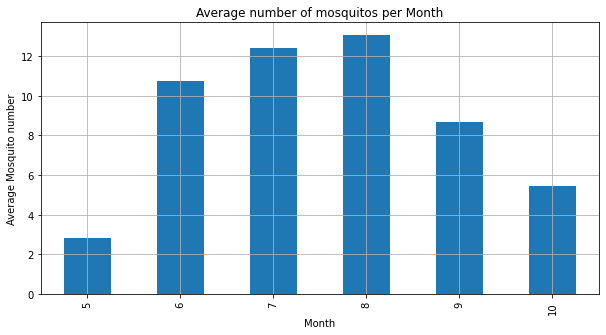

In [476]:
## function for visualising average of number of mosquitos grouped by week

plt.figure(figsize=(10, 5))
stat_df3.groupby(['Month'])['Mosquito number'].mean().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Mosquito number') 
plt.title('Average number of mosquitos per Month')
plt.grid()
plt.show()

__Insigts from the above graph--__

1. From the above graph it can be seen that month of August has the most average number of mosquitoes compared to all months in the year.
2. First one-third of the year, that is, first four months have zero mosquitoes caught. Same can be seen in Nov and Dec. It seems like there are no mosquitoes in the winters in City of Chicago, or they only collected the data during particular time of the year.
3. Average number of mosquitoes keep on increasing with the rise of temperatues and start declining with the drop of temperature.

---

---

---

## Part 2 - Statistical Analysis
<a class ='anchor' id = 'part2' ></a>

### Question1: Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?
<a class ='anchor' id = 'Que2.1' ></a>

In [512]:
stat_df3.head()

,Year,Week,Trap,Date,WNV Present,Species,Lat,Lon,Address Block,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL
0,2007,21,T002,2007-05-29 00:05:00,0,CULEX RESTUANS,41.956299,-87.797517,41XX N OAK PARK AVE,5,1,0,1,0,0
1,2007,21,T007,2007-05-29 00:05:00,0,CULEX RESTUANS,41.995492,-87.769609,62XX N MANDELL AVE,5,1,1,0,0,0
2,2007,21,T015,2007-05-29 00:05:00,0,CULEX RESTUANS,41.974183,-87.825241,79XX W FOSTER AVE,5,4,0,1,0,0
3,2007,21,T045,2007-05-29 00:05:00,0,CULEX RESTUANS,41.921705,-87.666963,15XX W WEBSTER AVE,5,2,0,1,0,0
4,2007,21,T046,2007-05-29 00:05:00,0,CULEX RESTUANS,41.892220,-87.691698,25XX W GRAND AVE,5,1,1,0,0,0


In [478]:
stat_df5 = stat_df3.loc[:, ["WNV Present", "Species"]]
stat_df5.head()

,WNV Present,Species
0,0,CULEX RESTUANS
1,0,CULEX RESTUANS
2,0,CULEX RESTUANS
3,0,CULEX RESTUANS
4,0,CULEX RESTUANS


Let's assume there is no statiscally significance difference between the presence of WNV and the species.

So, let's create a NULL hypothesis and ALTERNATE hypothesis.

__H0 (NULL hypothesis):__ Both the columns are same OR there is statiscally no difference between the WNV Present and the Species

__H1 (ALTERNATE hypothesis):__ These both columns are statiscally different

Since, categorical data is represented in both the columns we can check the significance with the help of Chi Squared Test

In [481]:
# chi square test
chi_square = pd.crosstab(stat_df3['Species'], stat_df3['WNV Present'])
chi_square

WNV Present,0,1
Species,,
CULEX PIPIENS,3972,1220
CULEX RESTUANS,9021,2042
CULEX SALINARIUS,215,7
CULEX TERRITANS,900,14


In [482]:
diff = stats.chi2_contingency(chi_square)
diff

(289.06184352112183,
 2.317119160315453e-62,
 3,
 array([[4211.87602783,  980.12397217],
        [8974.57328503, 2088.42671497],
        [ 180.09177161,   41.90822839],
        [ 741.45891553,  172.54108447]]))

__Conclusion__: From above our p-value is very small compared to 0.05. Therefor we CAN REJECT the null hypothesis which says there is statiscally no difference between WNV Present and the Species. There must be statistical difference between the WNV Present and the Species.



__Discussion:__ Positive CULEX TERRITANS see a huge deviation from the actual count. Expected array shows almost 12 times the value of the postive CULEX TERRITANS compared to actual value.

__Hold On:__ There are some assumptions of Chi squared test. Lets check on those.

#### Assumptions of the Chi-Squared Test

- The data in the cells should be frequencies.
- The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one level of each of the variables.
- Each subject may contribute data to one and only one cell.
- The study groups must be independent.

I think we have all the requirements which chi square test offers before doing it. All these assumptions can be checked in chi_square datatable made above.

__Note:__ There can always be errors such as Type I and Type II errors with whatever tests are done on the categorical and numeric columns. These errors occur when NULL hypothesis is falsefully rejected when it should not be.

Part 3 of the deliverable asks that WNV Present should not be one of the independent variables, and maybe there's an error in the above chi sqaure test conducted. 

---

### Question2: Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?
<a class ='anchor' id = 'Que2.2' ></a>

In [513]:
stat_df3.head()

,Year,Week,Trap,Date,WNV Present,Species,Lat,Lon,Address Block,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL
0,2007,21,T002,2007-05-29 00:05:00,0,CULEX RESTUANS,41.956299,-87.797517,41XX N OAK PARK AVE,5,1,0,1,0,0
1,2007,21,T007,2007-05-29 00:05:00,0,CULEX RESTUANS,41.995492,-87.769609,62XX N MANDELL AVE,5,1,1,0,0,0
2,2007,21,T015,2007-05-29 00:05:00,0,CULEX RESTUANS,41.974183,-87.825241,79XX W FOSTER AVE,5,4,0,1,0,0
3,2007,21,T045,2007-05-29 00:05:00,0,CULEX RESTUANS,41.921705,-87.666963,15XX W WEBSTER AVE,5,2,0,1,0,0
4,2007,21,T046,2007-05-29 00:05:00,0,CULEX RESTUANS,41.892220,-87.691698,25XX W GRAND AVE,5,1,1,0,0,0


We have to find the correlation of every column with the Mosquito number column

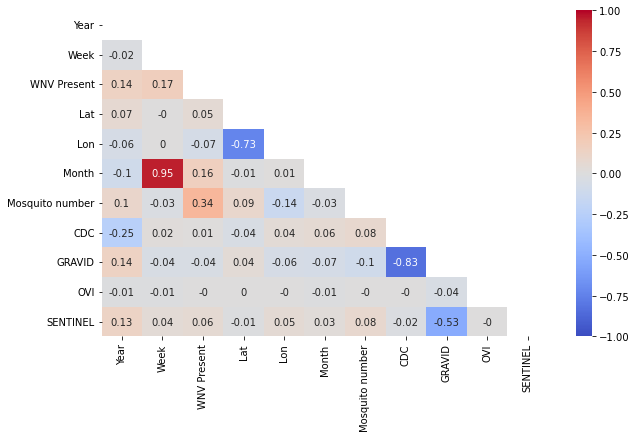

In [489]:
corr_df = stat_df3.corr()

# mask for upper trianle
mask = np.triu(corr_df)

# visualise with seaborn
plt.figure(figsize = (10, 6))
sns.heatmap(corr_df.round(2), cmap='coolwarm', annot=True, vmin=-1, vmax=1, center=0, mask=mask)
plt.show()

From above, looking into the x-axis and mosquito number column, numbers can be seen as positives and negatives with each of the column names on the y-axis.

Boxes which show number greater than zero are in positive correlation with the Mosquito number and vice-versa.

1. So, columns SENTINEL, CDC, Lat, WNV Present and Year (total 5 columns) are in positive correlation with the mosquitoes caught.

2. Columns OVI, GRAVID, month, Lon and week (total 5 columns) are in negative correlation with the number of mosquitoes caught.

3. But there is no HIGH postive or negative collinarity of number of mosquitoes caught with any of the columns.

Now the question is are these correlations statiscally significant?? Let's check it.

In [650]:
# Separate the data into X and y variables
# X is the data containing the independent variables.
# y is the target.  The dependent variable.
X = stat_df3.drop(columns='Mosquito number')
y = stat_df3['Mosquito number']

In [651]:
# Checking the shape of X and y variables

print(f'Original data set had {stat_df3.shape[0]} rows and {stat_df3.shape[1]} columns.')
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns.')
print(f'y has {y.shape[0]} rows and 1 column.')

Original data set had 17391 rows and 14 columns.
X has 17391 rows and 13 columns.
y has 17391 rows and 1 column.


For the correlations to be statiscally significant we have check the p values and then see if these are below 0.05. 

First we have to convert all the text data into numeric one and then run model to calculate the p value. Then we can tell which are statiscally significant or not.

All of this process is done in Ques 1 of part 3.

---

---

---

## PART3:  Advanced Statistical Analysis
<a class ='anchor' id = 'part3' ></a>

### Question1: Run a linear regression to determine how the independent variables affect the number of mosquitoes caught. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.
<a class ='anchor' id = 'Que3.1' ></a>

In [517]:
#peek into the data
stat_df3.head()

,Year,Week,Trap,Date,WNV Present,Species,Lat,Lon,Address Block,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL
0,2007,21,T002,2007-05-29 00:05:00,0,CULEX RESTUANS,41.956299,-87.797517,41XX N OAK PARK AVE,5,1,0,1,0,0
1,2007,21,T007,2007-05-29 00:05:00,0,CULEX RESTUANS,41.995492,-87.769609,62XX N MANDELL AVE,5,1,1,0,0,0
2,2007,21,T015,2007-05-29 00:05:00,0,CULEX RESTUANS,41.974183,-87.825241,79XX W FOSTER AVE,5,4,0,1,0,0
3,2007,21,T045,2007-05-29 00:05:00,0,CULEX RESTUANS,41.921705,-87.666963,15XX W WEBSTER AVE,5,2,0,1,0,0
4,2007,21,T046,2007-05-29 00:05:00,0,CULEX RESTUANS,41.892220,-87.691698,25XX W GRAND AVE,5,1,1,0,0,0


In [518]:
# Summary statistics 
stat_df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,17391.0,2012.851015,3.733403,2007.000000,2010.000000,2013.000000,2016.000000,2019.000000
Week,17391.0,31.023748,4.382891,20.000000,28.000000,31.000000,34.000000,40.000000
WNV Present,17391.0,0.188776,0.391342,0.000000,0.000000,0.000000,0.000000,1.000000
Lat,17391.0,41.848745,0.114416,41.644720,41.746732,41.867599,41.962015,42.017801
Lon,17391.0,-87.706946,0.091301,-87.880969,-87.764737,-87.700238,-87.643076,-87.531051
Month,17391.0,7.631764,1.006986,5.000000,7.000000,8.000000,8.000000,10.000000
Mosquito number,17391.0,11.570582,20.657879,1.000000,2.000000,4.000000,13.000000,500.000000
CDC,17391.0,0.027255,0.162832,0.000000,0.000000,0.000000,0.000000,1.000000
GRAVID,17391.0,0.961359,0.192743,0.000000,1.000000,1.000000,1.000000,1.000000
OVI,17391.0,0.000058,0.007583,0.000000,0.000000,0.000000,0.000000,1.000000


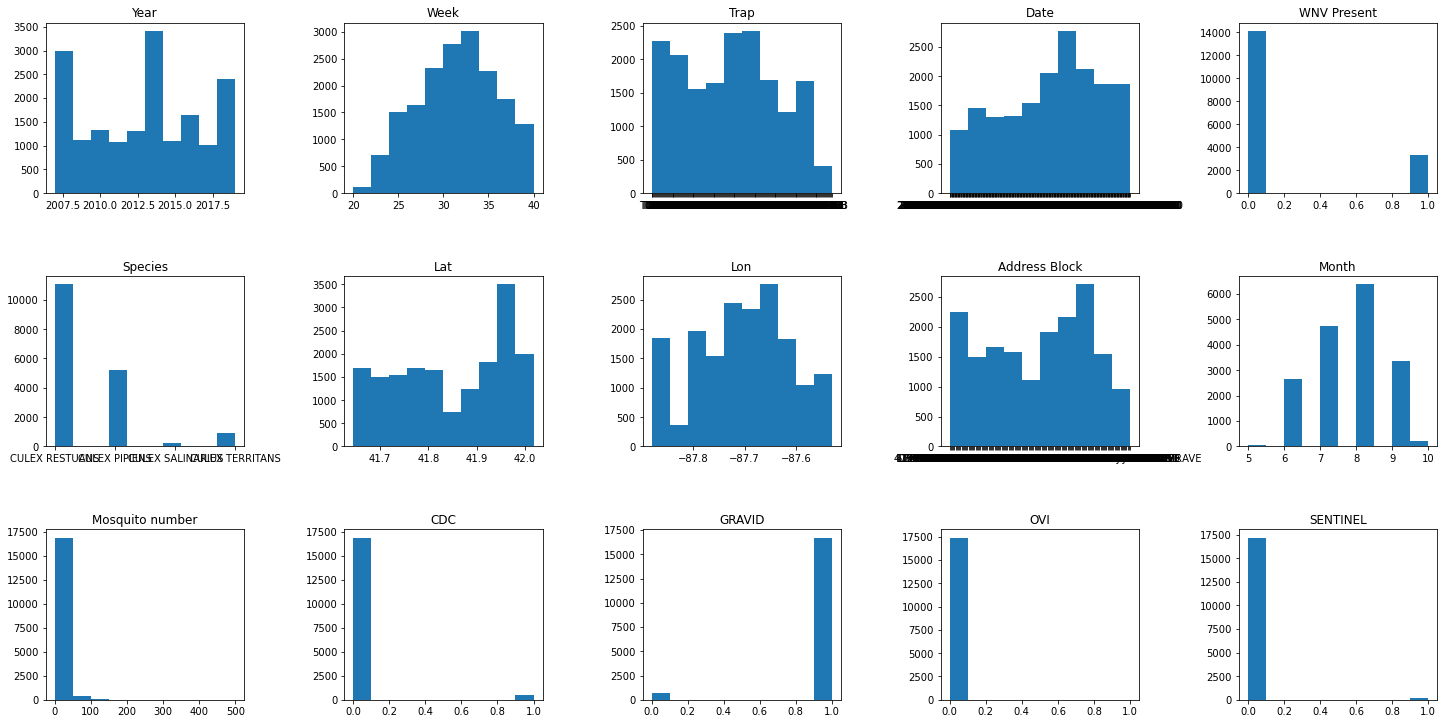

In [519]:
# Lets check out the distributions.

# Setting the plots layout
plt.subplots(3,5, figsize=(20,10))

# Plotting
for i, column in enumerate(stat_df3.columns, 1):
    plt.subplot(3,5,i)
    plt.hist(stat_df3[column])
    plt.title(column)
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

Above graphs show that all the columns have varied distrubutions except week column whose distribution seems like to be normal.

As there is a text data in the __categorical columns we need to convert them to numeric data__, so that we can proceed further with making models.

Important thing to note here is that __Mosquito number is continous data (not discrete)__, so obviously LINEAR regression is done to make any sort of predictions.

Whereas __WNV Present which is in question 3 is discrete data__, LOGISTIC regression is done to make the models.

Now lets convert the text data into numeric data as much as possible and then proceed with the modelling,

### Date

In [520]:
#lets drop the date column as we have same information in year, week and month column
stat_df3.drop(columns = 'Date',inplace = True)

In [521]:
#check 
stat_df3.head()

,Year,Week,Trap,WNV Present,Species,Lat,Lon,Address Block,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL
0,2007,21,T002,0,CULEX RESTUANS,41.956299,-87.797517,41XX N OAK PARK AVE,5,1,0,1,0,0
1,2007,21,T007,0,CULEX RESTUANS,41.995492,-87.769609,62XX N MANDELL AVE,5,1,1,0,0,0
2,2007,21,T015,0,CULEX RESTUANS,41.974183,-87.825241,79XX W FOSTER AVE,5,4,0,1,0,0
3,2007,21,T045,0,CULEX RESTUANS,41.921705,-87.666963,15XX W WEBSTER AVE,5,2,0,1,0,0
4,2007,21,T046,0,CULEX RESTUANS,41.892220,-87.691698,25XX W GRAND AVE,5,1,1,0,0,0


Question asks that WNV Present should not be one of the independent variables, so we need to drop from the above dataset.

But let's see does it really matters, like if it is in high collinearity with any of the independent variables then we will drop it, and can find the reason for it too.


### Species

In [522]:
#let's change columns to numerics one by one
# Check all distinct values for species column
stat_df3['Species'].value_counts()

CULEX RESTUANS      11063
CULEX PIPIENS        5192
CULEX TERRITANS       914
CULEX SALINARIUS      222
Name: Species, dtype: int64

Its not possible to merge any one of species with the other as numbers are not small. However, we can create dummies and inject them into the dataset.


In [523]:
# creating dummies by the following function
dum_species1 = pd.get_dummies(stat_df3['Species'])
dum_species1.head()

,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [524]:
del4_df = pd.concat([stat_df3, dum_species1], axis=1)
del4_df.head()

,Year,Week,Trap,WNV Present,Species,Lat,Lon,Address Block,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2007,21,T002,0,CULEX RESTUANS,41.956299,-87.797517,41XX N OAK PARK AVE,5,1,0,1,0,0,0,1,0,0
1,2007,21,T007,0,CULEX RESTUANS,41.995492,-87.769609,62XX N MANDELL AVE,5,1,1,0,0,0,0,1,0,0
2,2007,21,T015,0,CULEX RESTUANS,41.974183,-87.825241,79XX W FOSTER AVE,5,4,0,1,0,0,0,1,0,0
3,2007,21,T045,0,CULEX RESTUANS,41.921705,-87.666963,15XX W WEBSTER AVE,5,2,0,1,0,0,0,1,0,0
4,2007,21,T046,0,CULEX RESTUANS,41.892220,-87.691698,25XX W GRAND AVE,5,1,1,0,0,0,0,1,0,0


In [525]:
#drop species column, we no longer need it
del5_df = del4_df.drop('Species', axis=1)
del5_df.head()

,Year,Week,Trap,WNV Present,Lat,Lon,Address Block,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2007,21,T002,0,41.956299,-87.797517,41XX N OAK PARK AVE,5,1,0,1,0,0,0,1,0,0
1,2007,21,T007,0,41.995492,-87.769609,62XX N MANDELL AVE,5,1,1,0,0,0,0,1,0,0
2,2007,21,T015,0,41.974183,-87.825241,79XX W FOSTER AVE,5,4,0,1,0,0,0,1,0,0
3,2007,21,T045,0,41.921705,-87.666963,15XX W WEBSTER AVE,5,2,0,1,0,0,0,1,0,0
4,2007,21,T046,0,41.892220,-87.691698,25XX W GRAND AVE,5,1,1,0,0,0,0,1,0,0


#### Address Block

As address block column represents both address and block where mosquitoes were caught, we'll first separate them before converting them into numerics.

In [526]:
# Apply split using an accessor
# new data frame with split value columns
new = del5_df["Address Block"].str.split(" ", n = 1, expand = True)
 
# making separate first name column from new data frame
del5_df["Block"]= new[0]
 
# making separate last name column from new data frame
del5_df["Address"]= new[1]
 
# Dropping old Name columns
del5_df.drop(columns =["Address Block"], inplace = True)
 
# df display
del5_df.head()

,Year,Week,Trap,WNV Present,Lat,Lon,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,Block,Address
0,2007,21,T002,0,41.956299,-87.797517,5,1,0,1,0,0,0,1,0,0,41XX,N OAK PARK AVE
1,2007,21,T007,0,41.995492,-87.769609,5,1,1,0,0,0,0,1,0,0,62XX,N MANDELL AVE
2,2007,21,T015,0,41.974183,-87.825241,5,4,0,1,0,0,0,1,0,0,79XX,W FOSTER AVE
3,2007,21,T045,0,41.921705,-87.666963,5,2,0,1,0,0,0,1,0,0,15XX,W WEBSTER AVE
4,2007,21,T046,0,41.892220,-87.691698,5,1,1,0,0,0,0,1,0,0,25XX,W GRAND AVE


In [528]:
del5_df['Address'].value_counts()

W OHARE AIRPORT       1429
S ASHLAND AVE          491
S STONY ISLAND AVE     422
N OAK PARK AVE         386
W 51ST ST              378
                      ... 
S RACINE AVE             2
S HAMLIN AVE             1
S OGLESBY AVE            1
W 127TH ST               1
W PARKER AVE             1
Name: Address, Length: 140, dtype: int64

As there are 140 different types of addresses it has hard to create them to numerics and add it to them original dataset. Moreover, some of the adddresses seem to be unclear and cannot be trusted if they represent the right entry in the dataset. Moreover, we have lat and lon which also represent the same thing as location and are also perfect in terms of pricesion of location.

So, we'll keep lat and lon and __drop address column.__

In [527]:
# lets drop the address column from our dataframe
del6_df = del5_df.drop('Address', axis=1)
del6_df.head()

,Year,Week,Trap,WNV Present,Lat,Lon,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,Block
0,2007,21,T002,0,41.956299,-87.797517,5,1,0,1,0,0,0,1,0,0,41XX
1,2007,21,T007,0,41.995492,-87.769609,5,1,1,0,0,0,0,1,0,0,62XX
2,2007,21,T015,0,41.974183,-87.825241,5,4,0,1,0,0,0,1,0,0,79XX
3,2007,21,T045,0,41.921705,-87.666963,5,2,0,1,0,0,0,1,0,0,15XX
4,2007,21,T046,0,41.892220,-87.691698,5,1,1,0,0,0,0,1,0,0,25XX


In [529]:
del6_df['Block'].value_counts()

100XX    1603
22XX      706
58XX      616
70XX      607
11XX      564
         ... 
80XX        5
29XX        2
112XX       2
88XX        2
54XX        1
Name: Block, Length: 87, dtype: int64

As seen from above there are 87 different kinds of blocks accross different samples of mosquitoes and traps were spread.

Let's plot these on a bar graph.

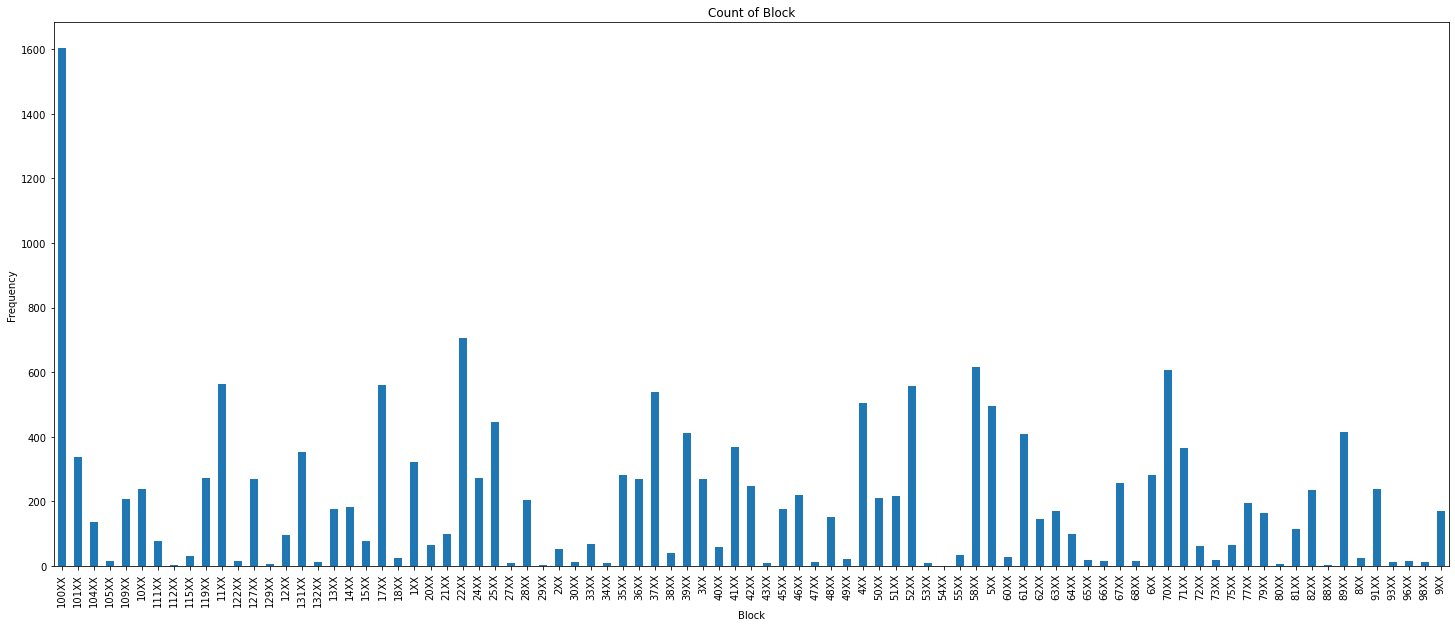

In [530]:
# bar graph for frequency of blocks accross the dataset
plt.figure(figsize=(25, 10))
del6_df['Block'].value_counts().sort_index().plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Block')
plt.title('Count of Block')
plt.show()

This is a varied distribution of the blocks around the City of Chicago. Considerably block number 100 has the most appearances in the dataset.

As such it gives the same information as lat and lon we can drop it or the other possible way drop lat and lon and make make groups/clusters of the blocks.

Either way clusters have to be made, so let's drop the block column and deal with lat and lon.

---

I tried converting Lat and Lon into a single column by making some clusters by searching on google, but wasn't success.

---

In [531]:
# lets drop the block column from our dataframe
del7_df = del6_df.drop('Block', axis=1)
del7_df.head()

,Year,Week,Trap,WNV Present,Lat,Lon,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2007,21,T002,0,41.956299,-87.797517,5,1,0,1,0,0,0,1,0,0
1,2007,21,T007,0,41.995492,-87.769609,5,1,1,0,0,0,0,1,0,0
2,2007,21,T015,0,41.974183,-87.825241,5,4,0,1,0,0,0,1,0,0
3,2007,21,T045,0,41.921705,-87.666963,5,2,0,1,0,0,0,1,0,0
4,2007,21,T046,0,41.892220,-87.691698,5,1,1,0,0,0,0,1,0,0


#### Trap

Lets see if we have traps of __satellite type__ as we had in the previos assignment.

In [532]:
del7_df['Trap_length'] = del7_df['Trap'].apply(len)
del7_df.head()

,Year,Week,Trap,WNV Present,Lat,Lon,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,Trap_length
0,2007,21,T002,0,41.956299,-87.797517,5,1,0,1,0,0,0,1,0,0,4
1,2007,21,T007,0,41.995492,-87.769609,5,1,1,0,0,0,0,1,0,0,4
2,2007,21,T015,0,41.974183,-87.825241,5,4,0,1,0,0,0,1,0,0,4
3,2007,21,T045,0,41.921705,-87.666963,5,2,0,1,0,0,0,1,0,0,4
4,2007,21,T046,0,41.892220,-87.691698,5,1,1,0,0,0,0,1,0,0,4


In [533]:
#lets check the counts of trap
del7_df['Trap'].value_counts()

T002     367
T031     332
T114     322
T008     310
T151     297
        ... 
T241       1
T167       1
T135B      1
T128A      1
T040       1
Name: Trap, Length: 190, dtype: int64

We can see that there are 190 different distinct traps, which will make our data set quite huge if we created dummy varibales for each of this. Ideally, we would classify them into satellite and non-satellite traps and then make a model considering this.

In [535]:
#lets check the counts of trap_length
del7_df['Trap_length'].value_counts()

4    16819
5      572
Name: Trap_length, dtype: int64

So we have 572 number of satellite traps and 16,819 number of non-satellite traps.

Let's drop the trap column.

In [536]:
# lets drop the trap column from our dataframe
del8_df = del7_df.drop('Trap', axis=1)
del8_df.head()

,Year,Week,WNV Present,Lat,Lon,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,Trap_length
0,2007,21,0,41.956299,-87.797517,5,1,0,1,0,0,0,1,0,0,4
1,2007,21,0,41.995492,-87.769609,5,1,1,0,0,0,0,1,0,0,4
2,2007,21,0,41.974183,-87.825241,5,4,0,1,0,0,0,1,0,0,4
3,2007,21,0,41.921705,-87.666963,5,2,0,1,0,0,0,1,0,0,4
4,2007,21,0,41.892220,-87.691698,5,1,1,0,0,0,0,1,0,0,4


In [537]:
del8_df.dtypes

Year                  int64
Week                  int64
WNV Present           int32
Lat                 float64
Lon                 float64
Month                 int64
Mosquito number       int64
CDC                   uint8
GRAVID                uint8
OVI                   uint8
SENTINEL              uint8
CULEX PIPIENS         uint8
CULEX RESTUANS        uint8
CULEX SALINARIUS      uint8
CULEX TERRITANS       uint8
Trap_length           int64
dtype: object

### Week

In [246]:
## lets check about week
del8_df['Week'].value_counts()

32    1576
33    1507
31    1488
30    1357
34    1247
29    1218
28    1196
35    1056
36     940
27     930
37     825
24     802
26     784
25     775
38     664
23     601
39     588
22     129
21      78
40      47
20      29
Name: Week, dtype: int64

Let's keep the week column like this only as there is quite varied distribution.

In [539]:
del8_df.head()

,Year,Week,WNV Present,Lat,Lon,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,Trap_length
0,2007,21,0,41.956299,-87.797517,5,1,0,1,0,0,0,1,0,0,4
1,2007,21,0,41.995492,-87.769609,5,1,1,0,0,0,0,1,0,0,4
2,2007,21,0,41.974183,-87.825241,5,4,0,1,0,0,0,1,0,0,4
3,2007,21,0,41.921705,-87.666963,5,2,0,1,0,0,0,1,0,0,4
4,2007,21,0,41.892220,-87.691698,5,1,1,0,0,0,0,1,0,0,4


Our dataset is all set to make a linear regression model now and check the dependies for the number of mosquitoes caught maybe make a equation for it to the best level of __accuracy__ with the most __confidence__ in it. Let's Begin!!!!

__NOTE:__ WNV Present should not be one of the independent variable, so we'll definitly drop it, but first let's check our assumptions.

#### Checking assumptions associated with linear regression models

There are four assumptions associated with a linear regression model:

1. **Linearity**: The relationship between the predictor and target variables to be linear.
2. **Independence/No Multicollinearity**: The predictor variables are independent of each other.
3. **Residuals** are normally distributed.**
4. **Homoscedasticity**: The variance of residual is the same for any value of X.**

`** Will be tested after modelling.`

#### Assumption#1 Linearity between predictor and target variable

In [542]:
# Separate the data into X and y variables
# X is the data containing the independent variables.
# y is the target.  The dependent variable.
X = del8_df.drop(columns='Mosquito number')
y = del8_df['Mosquito number']

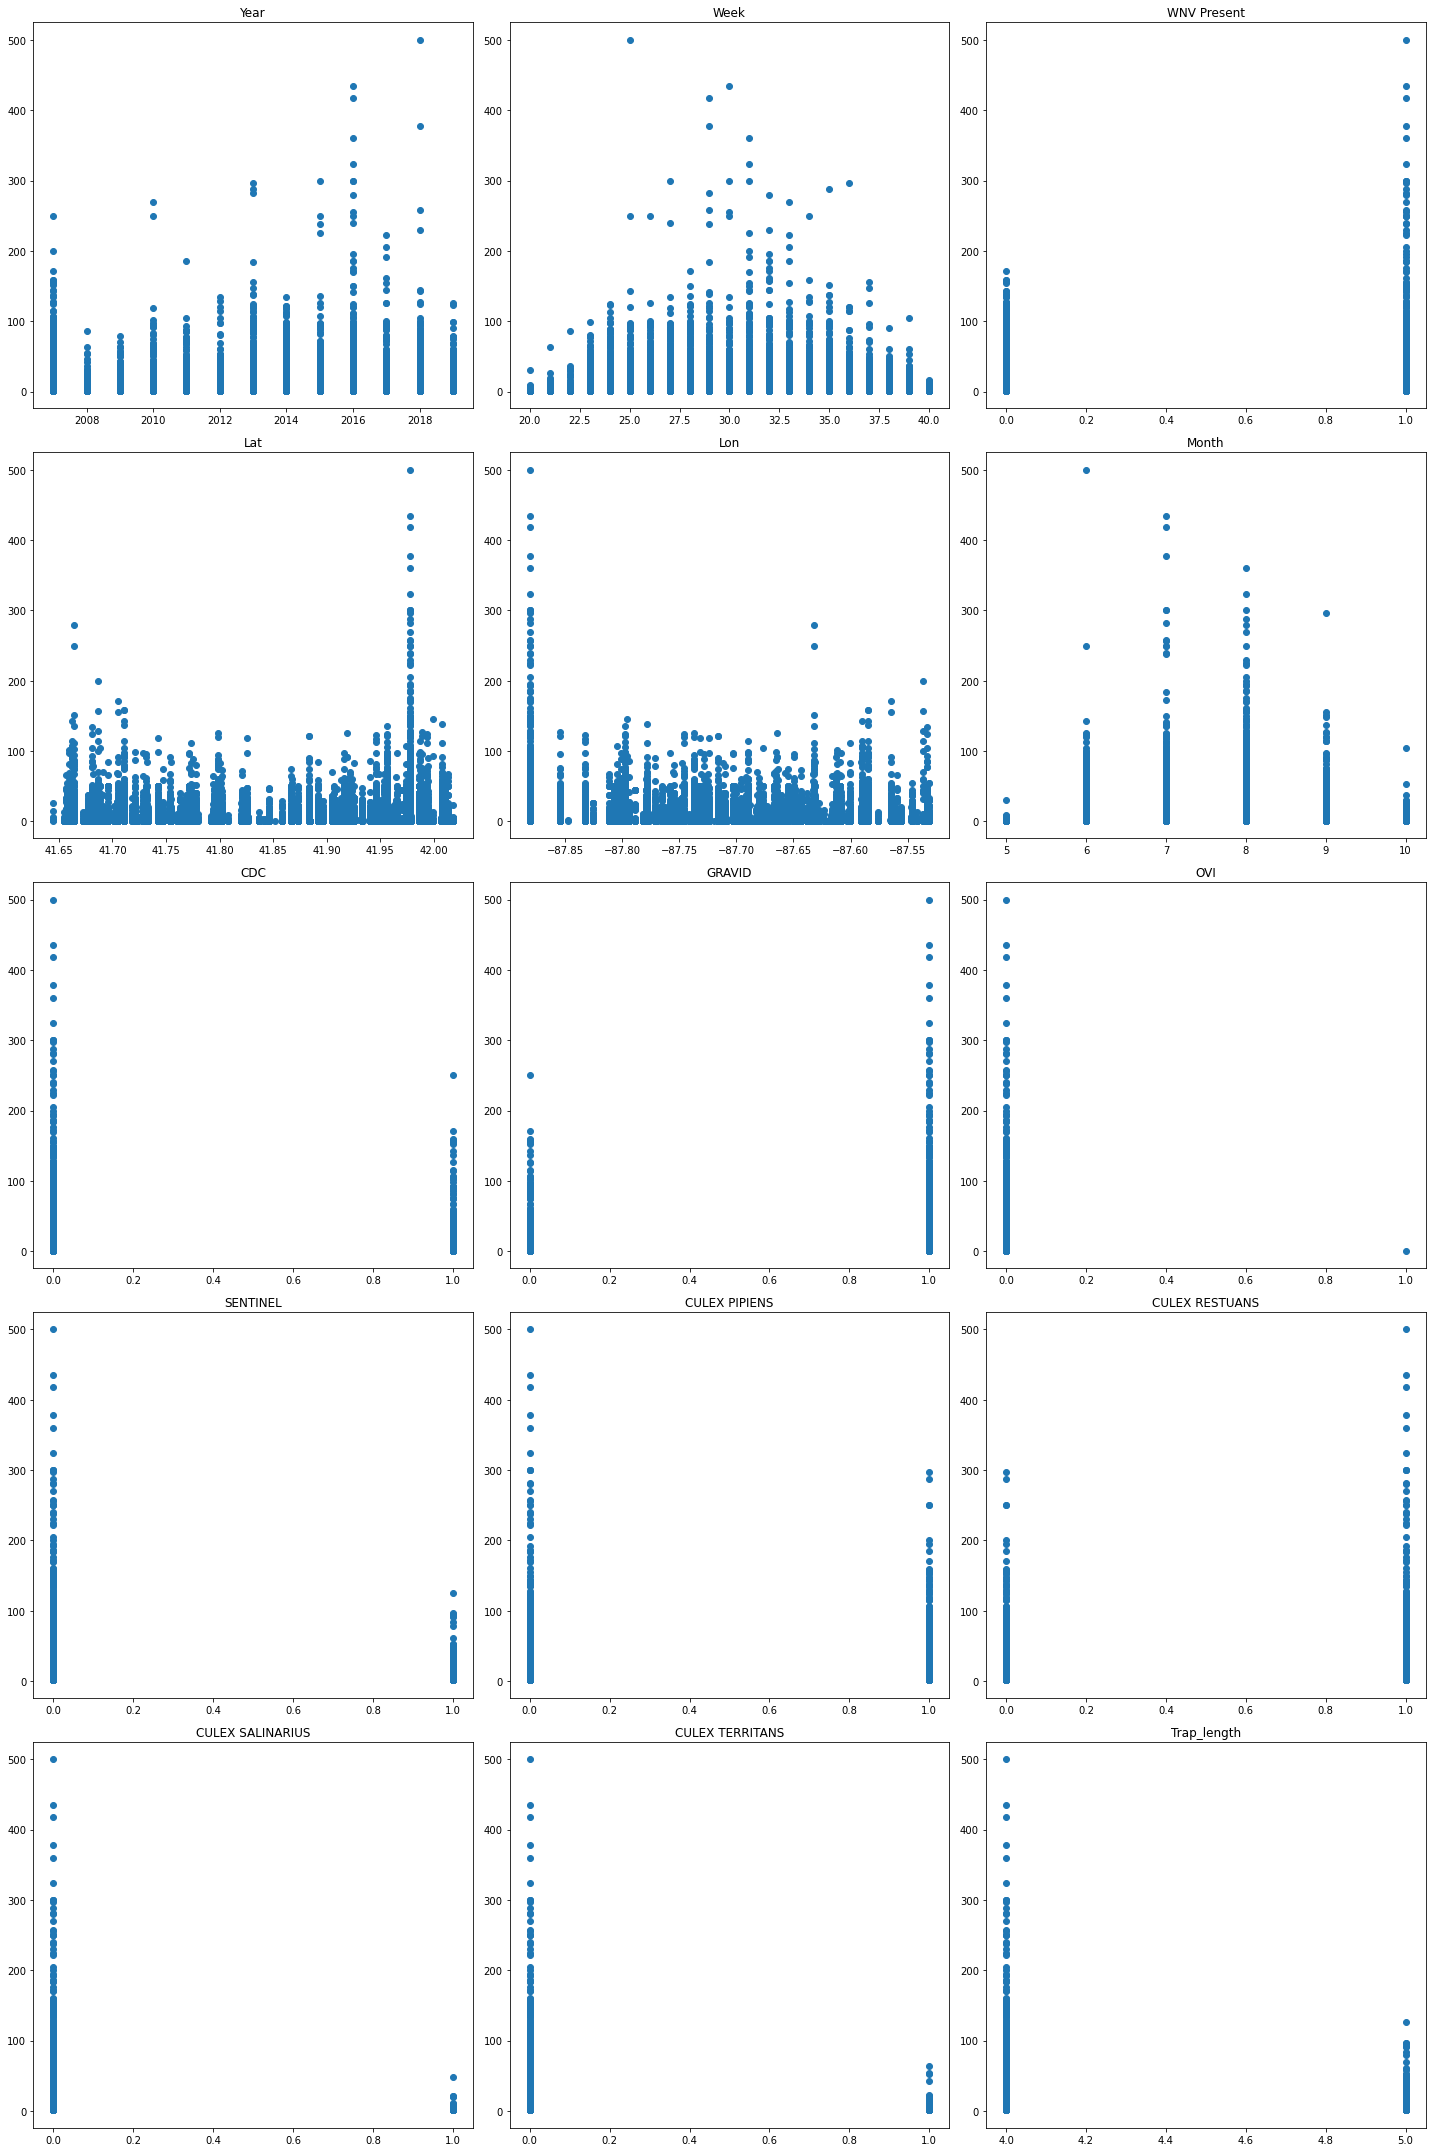

In [541]:
# Loop over the columns and plot the relationship between each column and the target
plt.subplots(5,3, figsize=(20,30))

count = 1

for col in X.columns:
    plt.subplot(5,3,count)
    plt.scatter(X[col],y)
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

From above there seems no linear relationship between the predictor variable and target variable, but this does not mean that they violate our first assumption of the linear regression model.


Linearity does not mean that the predictor variables have to be continuous; it merely means the target variable is a linear function of whatever values the predictor variables happen to take on, as in, for example, the linear function 3𝑥, which makes no assumptions about 𝑥.

#### Assumption #2: Checking multi collinearity in dependent variables

In [544]:
# Correlation between independent variables
X_corr = X.corr()
X_corr

,Year,Week,WNV Present,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,Trap_length
Year,1.000000,-0.016849,0.137091,0.069656,-0.059375,-0.095401,-0.247868,0.138480,-0.011885,0.130019,-0.338574,0.332855,-0.065846,0.009813,0.100628
Week,-0.016849,1.000000,0.173868,-0.002286,0.003000,0.949944,0.022702,-0.040505,-0.013883,0.039836,0.312433,-0.311005,-0.012303,0.036000,0.024968
WNV Present,0.137091,0.173868,1.000000,0.054835,-0.067876,0.161086,0.011298,-0.040514,-0.003658,0.056665,0.077022,-0.014179,-0.045691,-0.104397,0.024733
Lat,0.069656,-0.002286,0.054835,1.000000,-0.734268,-0.009286,-0.042424,0.043130,0.001599,-0.013391,-0.039211,0.061580,-0.003018,-0.050837,0.048630
Lon,-0.059375,0.003000,-0.067876,-0.734268,1.000000,0.009322,0.036613,-0.057926,-0.004800,0.049509,0.002883,-0.032815,-0.007893,0.068809,0.115007
Month,-0.095401,0.949944,0.161086,-0.009286,0.009322,1.000000,0.062966,-0.070945,-0.012288,0.033208,0.326795,-0.323339,-0.009793,0.031877,0.017492
CDC,-0.247868,0.022702,0.011298,-0.042424,0.036613,0.062966,1.000000,-0.834926,-0.001269,-0.017917,0.139282,-0.133244,0.043881,-0.020433,-0.030869
GRAVID,0.138480,-0.040505,-0.040514,0.043130,-0.057926,-0.070945,-0.834926,1.000000,-0.037824,-0.533906,-0.091517,0.082153,-0.033012,0.027164,-0.290891
OVI,-0.011885,-0.013883,-0.003658,0.001599,-0.004800,-0.012288,-0.001269,-0.037824,1.000000,-0.000812,0.011624,-0.010027,-0.000862,-0.001786,-0.001398
SENTINEL,0.130019,0.039836,0.056665,-0.013391,0.049509,0.033208,-0.017917,-0.533906,-0.000812,1.000000,-0.048459,0.056109,-0.007332,-0.017905,0.577379


In the above table, obviosly the diagonal is all 1s. Also it's very hard to interpret such large set of numbers from the table. So heatmap would be best to use in tgis case to use the correlation.

Note: 
1 represents highest positive correlation.
0 represents no correlation.
-1 repesents highest negative correlation.

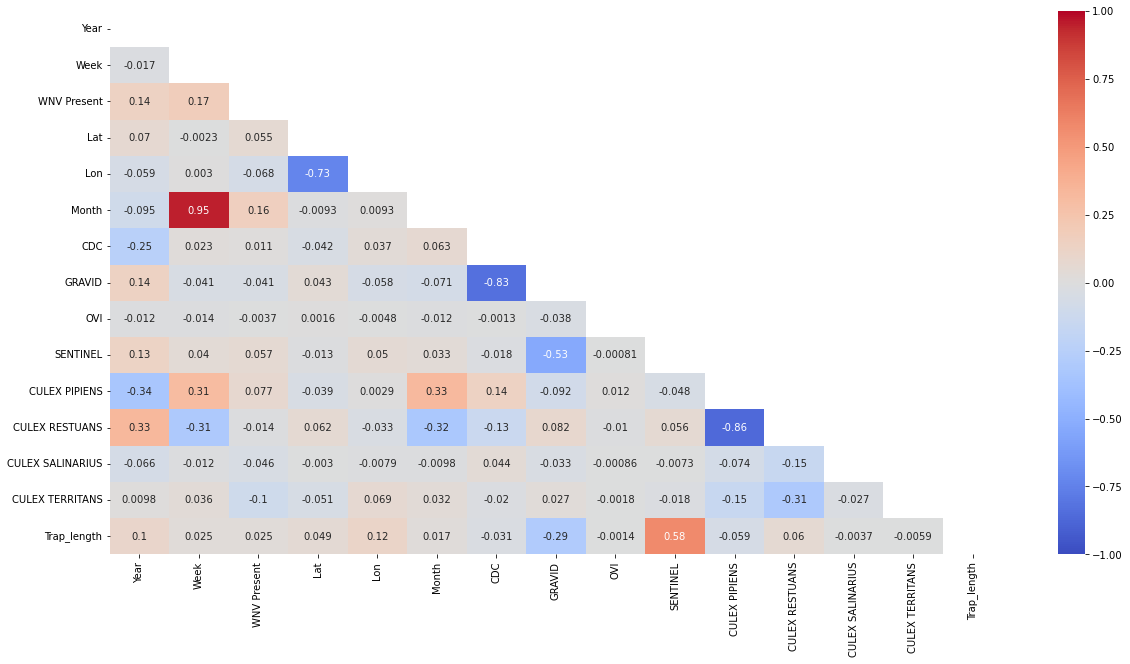

In [545]:
# Correlation of the variables in a heatmap
plt.figure(figsize=(20,10))


matrix = np.triu(X.corr())


sns.heatmap(X.corr(), annot=True, mask=matrix, cmap='coolwarm', vmin = -1.0, vmax = 1.0)
plt.show()

#### Insights from the above heatmap

1. From the above heatmap, __Week and Month__ are in high __positive__ correllinearity with each other.
2. __Lat and Lon__ are in high __negative__ correllinearity with each other.
3. __GRAVID and CDC__ are also in kind of __negative__ correllinearity with each other.
4. __CULEX PIPIENS and CULEX RESTUANS__ are in __negative__ high correllinearity.



We need to make __sure to keep this in mind__ when building our model.

We are also interested in the correlations between the X variables and the y variable (Mosquito number). Let's look at those those.

In [546]:
# Let's only look at the correlations with Mosquito number (our y variable)
del8_df_corr = del8_df.corr()
del8_df_corr['Mosquito number'].sort_values()

Lon                -0.144528
CULEX TERRITANS    -0.109343
GRAVID             -0.104599
CULEX SALINARIUS   -0.052187
Month              -0.030397
Week               -0.025767
OVI                -0.003880
CULEX PIPIENS       0.007844
Trap_length         0.020565
CULEX RESTUANS      0.055431
SENTINEL            0.075084
CDC                 0.075194
Lat                 0.086622
Year                0.097755
WNV Present         0.336526
Mosquito number     1.000000
Name: Mosquito number, dtype: float64

As we can see above, the variables that are correlated the most with our target are __CULEX TERRITANS and WNV Present__. The rest of the columns have correlation of .1 or less.

The below seaborn plot is just the replication of the heatmap we have drawn above to see the multicollinearity amongst the independent variable.

Heatmap works best as it's very hard to interpret from the following plot.

<Figure size 2160x1440 with 0 Axes>

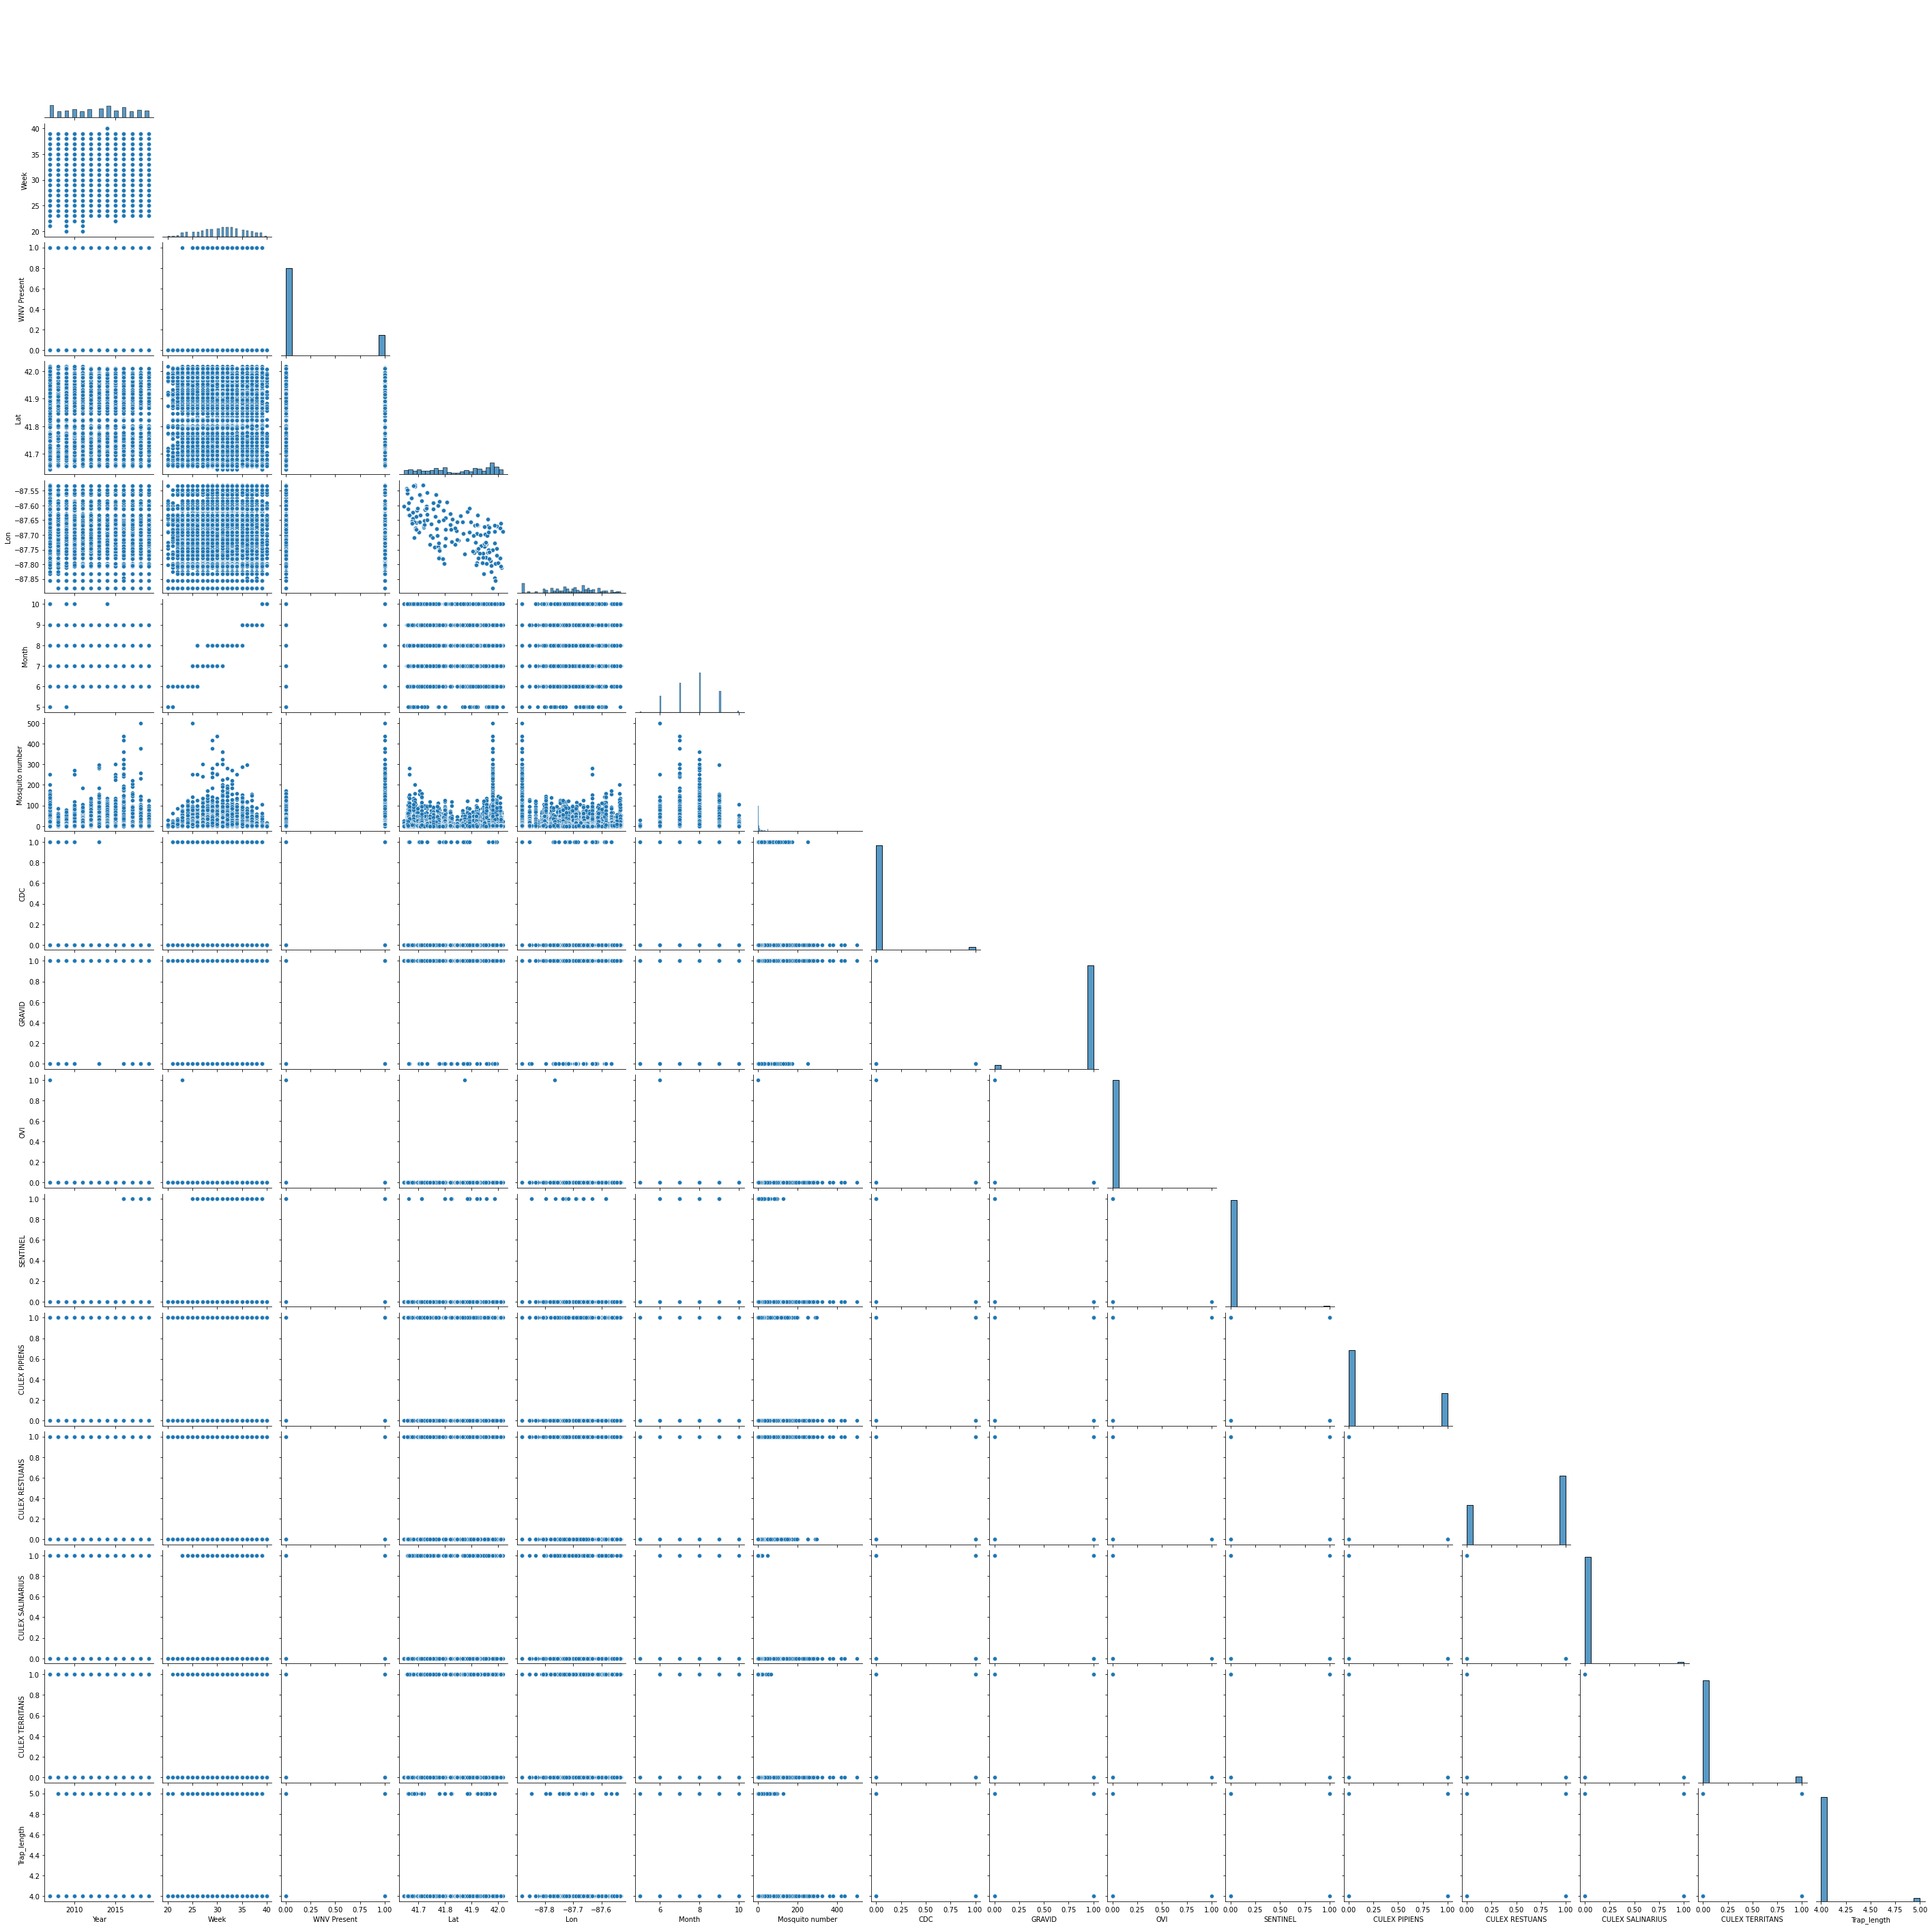

In [547]:
# Use seaborn pairplot to look for collinearity in X variables
plt.figure(figsize=(30,20))
sns.pairplot(del8_df, corner=True)
plt.show()

We'll do step 3 and step 4 of the assumptions after making the model.

Now based on the multicollinearity let's drop the columns which we don't want.

## Step 3: Variable selection for model

Let's build some models to predict mosquito number.

In [548]:
# import statsmodels linear model for our regression
from statsmodels.regression import linear_model 
import statsmodels.api as sm

In [549]:
# Double check for our constant
X.head()

,Year,Week,WNV Present,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,Trap_length
0,2007,21,0,41.956299,-87.797517,5,0,1,0,0,0,1,0,0,4
1,2007,21,0,41.995492,-87.769609,5,1,0,0,0,0,1,0,0,4
2,2007,21,0,41.974183,-87.825241,5,0,1,0,0,0,1,0,0,4
3,2007,21,0,41.921705,-87.666963,5,0,1,0,0,0,1,0,0,4
4,2007,21,0,41.892220,-87.691698,5,1,0,0,0,0,1,0,0,4


### 3.1. Backward or Top-Down approach

#### Model 3.1.1.

Let's first look at our model with all the variables we have, and then we will remove the least useful variables, one-at-a-time.

In [551]:
# fit our first linear model
my_linreg1 = linear_model.OLS(y, X).fit()
my_linreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     246.2
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:37:58   Log-Likelihood:                -75868.
No. Observations:               17391   AIC:                         1.518e+05
Df Residuals:                   17377   BIC:                         1.519e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Year                 0.3287      0.044      7.416      0.000       0.242       0.416
Week                -0.2593      0.109     -2.376      0.018      -0.473      -0.045
WNV Present         16.9841      0.382     44.444      0.000      16.235      17.733
Lat                 -8.7209      1.903     -4.582      0.000     -12.452      -4.990
Lon                -35.3568      2.399    -14.736      0.000     -40.060     -30.654
Month               -0.6520      0.475     -1.373      0.170      -1.583       0.279
CDC              -1678.5838     90.316    -18.586      0.000   -1855.612   -1501.556
GRAVID           -1690.4841     90.416    -18.697      0.000   -1867.709   -1513.259
OVI              -1701.0609     91.922    -18.505      0.000   -1881.238   -1520.884
SENTINEL         -1678.2503     90.606    -18.523      0.000   -1855.847   -1500.654
CULEX PIPIENS    -1683.5603     90.420    -18.619      0.000   -1860.793   -1506.327
CULEX RESTUANS   -1683.8528     90.471    -18.612      0.000   -1861.186   -1506.520
CULEX SALINARIUS -1691.3609     90.446    -18.700      0.000   -1868.645   -1514.077
CULEX TERRITANS  -1689.6051     90.432    -18.684      0.000   -1866.860   -1512.350
Trap_length         -0.5272      1.020     -0.517      0.605      -2.526       1.472
==============================================================================
Omnibus:                    22037.079   Durbin-Watson:                   1.479
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6190165.793
Skew:                           6.808   Prob(JB):                         0.00
Kurtosis:                      94.418   Cond. No.                     2.09e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.62e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The p-value for Trap_length is above 0.05, which shows there is no evidence showing this variable is statistically significant to our model.

We will drop this column and try building another model.

#### Model 3.1.2.

In [552]:
# we will drop the 'non_retail_business' variable and perform another regression
X2 = X.drop(columns=['Trap_length'])

my_linreg2 = linear_model.OLS(y, X2).fit()
my_linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     266.7
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:38:29   Log-Likelihood:                -75868.
No. Observations:               17391   AIC:                         1.518e+05
Df Residuals:                   17378   BIC:                         1.519e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Year                 0.3283      0.044      7.408      0.000       0.241       0.415
Week                -0.2598      0.109     -2.380      0.017      -0.474      -0.046
WNV Present         16.9854      0.382     44.449      0.000      16.236      17.734
Lat                 -8.9329      1.859     -4.806      0.000     -12.576      -5.290
Lon                -35.6432      2.334    -15.269      0.000     -40.219     -31.068
Month               -0.6508      0.475     -1.371      0.170      -1.582       0.280
CDC              -1687.2716     88.736    -19.014      0.000   -1861.204   -1513.340
GRAVID           -1699.1796     88.836    -19.127      0.000   -1873.306   -1525.053
OVI              -1709.7625     90.366    -18.920      0.000   -1886.888   -1532.637
SENTINEL         -1687.4465     88.840    -18.994      0.000   -1861.582   -1513.311
CULEX PIPIENS    -1692.3777     88.795    -19.059      0.000   -1866.425   -1518.331
CULEX RESTUANS   -1692.6739     88.845    -19.052      0.000   -1866.820   -1518.528
CULEX SALINARIUS -1700.1849     88.819    -19.142      0.000   -1874.279   -1526.091
CULEX TERRITANS  -1698.4238     88.806    -19.125      0.000   -1872.492   -1524.355
==============================================================================
Omnibus:                    22036.253   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6188600.324
Skew:                           6.808   Prob(JB):                         0.00
Kurtosis:                      94.406   Cond. No.                     2.06e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

It is quite much like a fun to note that the value of R^2 is just 0.156 or 15.6% which is quite low in my terms. In general higher the value for the R^2 more accurate is our linear model.

This is because R^2 value is calculated with the variance of the model. More is the variance of the model, more is the R^2 value.

__So in our case we have less variance in the model, which means we have a lot of fitted values scattered around our prediction, line which makes our model less accurate and with low confidence.__

However, as the question says that WNV Present should not be one of the independent variables, dont know the reason behind it, but let's drop it and make the model again.

### Model 3.1.3.

In [553]:
# we will drop the 'non_retail_business' variable and perform another regression
X3 = X2.drop(columns=['WNV Present'])

my_linreg3 = linear_model.OLS(y, X3).fit()
my_linreg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     99.95
Date:                Sun, 23 Oct 2022   Prob (F-statistic):          1.01e-221
Time:                        20:39:16   Log-Likelihood:                -76804.
No. Observations:               17391   AIC:                         1.536e+05
Df Residuals:                   17379   BIC:                         1.537e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Year                 0.6241      0.046     13.498      0.000       0.533       0.715
Week                -0.1075      0.115     -0.934      0.350      -0.333       0.118
Lat                 -8.6033      1.961     -4.386      0.000     -12.448      -4.759
Lon                -39.3953      2.462    -16.002      0.000     -44.221     -34.570
Month               -0.2454      0.501     -0.490      0.624      -1.227       0.737
CDC              -2158.0543     92.973    -23.212      0.000   -2340.290   -1975.818
GRAVID           -2171.5966     93.074    -23.332      0.000   -2354.030   -1989.163
OVI              -2182.7261     94.698    -23.049      0.000   -2368.344   -1997.108
SENTINEL         -2157.7708     93.084    -23.181      0.000   -2340.225   -1975.316
CULEX PIPIENS    -2162.1211     93.038    -23.239      0.000   -2344.485   -1979.757
CULEX RESTUANS   -2163.3000     93.089    -23.239      0.000   -2345.764   -1980.836
CULEX SALINARIUS -2172.7609     93.055    -23.349      0.000   -2355.159   -1990.363
CULEX TERRITANS  -2171.9659     93.039    -23.345      0.000   -2354.331   -1989.600
==============================================================================
Omnibus:                    21609.835   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5446062.164
Skew:                           6.599   Prob(JB):                         0.00
Kurtosis:                      88.683   Cond. No.                     2.08e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Week and month have p values greater than 5%. However R^2 value has dropped even lower to 0.059 or 5.9 %

Let's drop week and month columns one by one and keep in check with the value of R^2.

### Model 3.1.4.

In [554]:
# we will drop the 'week' variable and perform another regression
X4 = X3.drop(columns=['Week'])

my_linreg4 = linear_model.OLS(y, X4).fit()
my_linreg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     109.9
Date:                Sun, 23 Oct 2022   Prob (F-statistic):          1.45e-222
Time:                        20:39:55   Log-Likelihood:                -76805.
No. Observations:               17391   AIC:                         1.536e+05
Df Residuals:                   17380   BIC:                         1.537e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Year                 0.6139      0.045     13.660      0.000       0.526       0.702
Lat                 -8.6137      1.961     -4.392      0.000     -12.458      -4.769
Lon                -39.3998      2.462    -16.004      0.000     -44.225     -34.574
Month               -0.6887      0.161     -4.286      0.000      -1.004      -0.374
CDC              -2147.7775     92.319    -23.265      0.000   -2328.733   -1966.822
GRAVID           -2161.3833     92.429    -23.384      0.000   -2342.554   -1980.213
OVI              -2172.4069     94.052    -23.098      0.000   -2356.757   -1988.056
SENTINEL         -2147.5552     92.440    -23.232      0.000   -2328.746   -1966.364
CULEX PIPIENS    -2151.8803     92.390    -23.291      0.000   -2332.973   -1970.787
CULEX RESTUANS   -2153.0229     92.437    -23.292      0.000   -2334.208   -1971.838
CULEX SALINARIUS -2162.5094     92.406    -23.402      0.000   -2343.634   -1981.385
CULEX TERRITANS  -2161.7103     92.389    -23.398      0.000   -2342.801   -1980.619
==============================================================================
Omnibus:                    21610.138   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5444976.529
Skew:                           6.600   Prob(JB):                         0.00
Kurtosis:                      88.674   Cond. No.                     2.35e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

R squared value remains the same and fortunately we have all pvalues less than 0.05. 

At this point we are not eliminating any of the coulmns from our model and consider this the best model with the backward approach.

__Note:__ Though many of the features have correlations amongst them as shown in the heatmap prior to the modelling, but they are not significant enough as seen from the above OLS model.

| Model | R^2 | P<0.5 |
| --- | --- | --- |
| 3.1.1 | 0.156 | No |
| 3.1.2 | 0.156 | No |
| 3.1.3 | 0.059 | No |
| 3.1.4 | 0.059 | Yes |

### 3.2. Forward or Bottom-Up approach

Now let's take a bottom-up approach to building a linear model using only the most correlated variables. We will start with choosing one variable (usually the variable with the highest correlation with our target variable) and then we will add more variables and see if the $R^2$ improves.

#### Model 3.2.1.

Let's look at our correlations with the target variable again:

In [555]:
# Let's take a look at the variables with highest correlation with y (`median_value`)

del8_df_corr['Mosquito number'].sort_values()

# What is the most strongly correlated variable?

Lon                -0.144528
CULEX TERRITANS    -0.109343
GRAVID             -0.104599
CULEX SALINARIUS   -0.052187
Month              -0.030397
Week               -0.025767
OVI                -0.003880
CULEX PIPIENS       0.007844
Trap_length         0.020565
CULEX RESTUANS      0.055431
SENTINEL            0.075084
CDC                 0.075194
Lat                 0.086622
Year                0.097755
WNV Present         0.336526
Mosquito number     1.000000
Name: Mosquito number, dtype: float64

As we can see above, WNV Present is correlated the most with median_value. Let's first remove this column as asked in the question.

In [556]:
del8_df.head()

,Year,Week,WNV Present,Lat,Lon,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,Trap_length
0,2007,21,0,41.956299,-87.797517,5,1,0,1,0,0,0,1,0,0,4
1,2007,21,0,41.995492,-87.769609,5,1,1,0,0,0,0,1,0,0,4
2,2007,21,0,41.974183,-87.825241,5,4,0,1,0,0,0,1,0,0,4
3,2007,21,0,41.921705,-87.666963,5,2,0,1,0,0,0,1,0,0,4
4,2007,21,0,41.892220,-87.691698,5,1,1,0,0,0,0,1,0,0,4


In [557]:
del9_df = del8_df.drop('WNV Present', axis=1)
del9_df.head()

,Year,Week,Lat,Lon,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,Trap_length
0,2007,21,41.956299,-87.797517,5,1,0,1,0,0,0,1,0,0,4
1,2007,21,41.995492,-87.769609,5,1,1,0,0,0,0,1,0,0,4
2,2007,21,41.974183,-87.825241,5,4,0,1,0,0,0,1,0,0,4
3,2007,21,41.921705,-87.666963,5,2,0,1,0,0,0,1,0,0,4
4,2007,21,41.892220,-87.691698,5,1,1,0,0,0,0,1,0,0,4


In [558]:
# Let's take a look at the variables with highest correlation with y 

del9_df_corr['Mosquito number'].sort_values()

# What is the most strongly correlated variable?

NameError: name 'del9_df_corr' is not defined

In [561]:
# Let's take a look at the variables with highest correlation with y (`median_value`)

del8_df_corr['Mosquito number'].sort_values()

# What is the most strongly correlated variable?

Lon                -0.144528
CULEX TERRITANS    -0.109343
GRAVID             -0.104599
CULEX SALINARIUS   -0.052187
Month              -0.030397
Week               -0.025767
OVI                -0.003880
CULEX PIPIENS       0.007844
Trap_length         0.020565
CULEX RESTUANS      0.055431
SENTINEL            0.075084
CDC                 0.075194
Lat                 0.086622
Year                0.097755
WNV Present         0.336526
Mosquito number     1.000000
Name: Mosquito number, dtype: float64

As we can see above, CULEX TERRITANS is correlated the most with Mosquito number. Let's build a model only including this variable:

In [562]:
import statsmodels.api as sm

In [563]:
X_withconstant = sm.add_constant(X) #we have to add in our intercept manually!

In [564]:
X_withconstant.head()

,const,Year,Week,WNV Present,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,Trap_length
0,1.0,2007,21,0,41.956299,-87.797517,5,0,1,0,0,0,1,0,0,4
1,1.0,2007,21,0,41.995492,-87.769609,5,1,0,0,0,0,1,0,0,4
2,1.0,2007,21,0,41.974183,-87.825241,5,0,1,0,0,0,1,0,0,4
3,1.0,2007,21,0,41.921705,-87.666963,5,0,1,0,0,0,1,0,0,4
4,1.0,2007,21,0,41.892220,-87.691698,5,1,0,0,0,0,1,0,0,4


In [565]:
# making model
my_linreg5 = linear_model.OLS(y, X_withconstant[['const', 'CULEX TERRITANS']]).fit()
my_linreg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     210.4
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           2.11e-47
Time:                        20:59:28   Log-Likelihood:                -77233.
No. Observations:               17391   AIC:                         1.545e+05
Df Residuals:                   17389   BIC:                         1.545e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.1026      0.160     75.654      0.000      11.789      12.416
CULEX TERRITANS   -10.1223      0.698    -14.506      0.000     -11.490      -8.754
==============================================================================
Omnibus:                    21683.367   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5327001.108
Skew:                           6.655   Prob(JB):                         0.00
Kurtosis:                      87.701   Cond. No.                         4.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R squared value is extremely low (just 1.2%) and p value is below 5%

### Model 3.2.2.

In [566]:
# Our model R-squared is not as good as our previous model, but the p-value is good,
# Let's add others variables to help predict the price
my_linreg6 = linear_model.OLS(y, X_withconstant[['const', 'CULEX TERRITANS', 'GRAVID']]).fit()
my_linreg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     198.2
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           7.55e-86
Time:                        21:00:09   Log-Likelihood:                -77142.
No. Observations:               17391   AIC:                         1.543e+05
Df Residuals:                   17388   BIC:                         1.543e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              22.5684      0.788     28.634      0.000      21.024      24.113
CULEX TERRITANS    -9.8665      0.694    -14.208      0.000     -11.228      -8.505
GRAVID            -10.9005      0.804    -13.558      0.000     -12.476      -9.325
==============================================================================
Omnibus:                    21777.147   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5543295.822
Skew:                           6.695   Prob(JB):                         0.00
Kurtosis:                      89.433   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R squared value is extremely low (just 2.2%) and p value is below 5%

### Model 3.2.3.

In [567]:
# Our model R-squared is not as good as our previous model, but the p-value is good,
# Let's add others variables to help predict the price
my_linreg7 = linear_model.OLS(y, X_withconstant[['const', 'CULEX TERRITANS', 'GRAVID', 'Year']]).fit()
my_linreg7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     212.0
Date:                Sun, 23 Oct 2022   Prob (F-statistic):          4.69e-135
Time:                        21:00:40   Log-Likelihood:                -77026.
No. Observations:               17391   AIC:                         1.541e+05
Df Residuals:                   17387   BIC:                         1.541e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1257.6818     83.667    -15.032      0.000   -1421.678   -1093.686
CULEX TERRITANS    -9.9310      0.690    -14.396      0.000     -11.283      -8.579
GRAVID            -12.6068      0.806    -15.633      0.000     -14.187     -11.026
Year                0.6369      0.042     15.302      0.000       0.555       0.718
==============================================================================
Omnibus:                    21822.221   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5612811.259
Skew:                           6.718   Prob(JB):                         0.00
Kurtosis:                      89.979   Cond. No.                     1.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R squared value is extremely low (just 3.5%) and p value is below 5%

### Model 3.2.4.

In [568]:
# Our model R-squared is not as good as our previous model, but the p-value is good,
# Let's add others variables to help predict the price
my_linreg8 = linear_model.OLS(y, X_withconstant[['const', 'CULEX TERRITANS', 'GRAVID', 'Year', 'SENTINEL']]).fit()
my_linreg8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     159.1
Date:                Sun, 23 Oct 2022   Prob (F-statistic):          5.59e-134
Time:                        21:01:00   Log-Likelihood:                -77025.
No. Observations:               17391   AIC:                         1.541e+05
Df Residuals:                   17386   BIC:                         1.541e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1273.1179     86.141    -14.779      0.000   -1441.963   -1104.273
CULEX TERRITANS    -9.9340      0.690    -14.400      0.000     -11.286      -8.582
GRAVID            -13.0193      0.975    -13.356      0.000     -14.930     -11.109
Year                0.6447      0.043     15.025      0.000       0.561       0.729
SENTINEL           -1.3355      1.773     -0.753      0.451      -4.811       2.140
==============================================================================
Omnibus:                    21817.002   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5608386.640
Skew:                           6.715   Prob(JB):                         0.00
Kurtosis:                      89.945   Cond. No.                     1.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here our R squred value is same but our pvalue for sentinel increases than 5%

### Model 3.2.5.

In [569]:
# Our model R-squared is not as good as our previous model, but the p-value is good,
# Let's add others variables to help predict the price
# here I dropped SENTINEL add Lon as new feature
my_linreg9 = linear_model.OLS(y, X_withconstant[['const', 'CULEX TERRITANS', 'GRAVID', 'Year', 'Lon']]).fit()
my_linreg9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     249.6
Date:                Sun, 23 Oct 2022   Prob (F-statistic):          8.06e-209
Time:                        21:01:53   Log-Likelihood:                -76852.
No. Observations:               17391   AIC:                         1.537e+05
Df Residuals:                   17386   BIC:                         1.538e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3927.0768    165.069    -23.790      0.000   -4250.629   -3603.525
CULEX TERRITANS    -9.0228      0.685    -13.177      0.000     -10.365      -7.681
GRAVID            -13.3875      0.800    -16.744      0.000     -14.955     -11.820
Year                0.5963      0.041     14.452      0.000       0.515       0.677
Lon               -31.3730      1.678    -18.696      0.000     -34.662     -28.084
==============================================================================
Omnibus:                    21597.399   Durbin-Watson:                   1.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5406718.537
Skew:                           6.595   Prob(JB):                         0.00
Kurtosis:                      88.366   Cond. No.                     2.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2 value increases to 5.4% and pvalue is also in check.

### Model 3.2.6.

In [570]:
# Our model R-squared is not as good as our previous model, but the p-value is good,
# Let's add others variables to help predict the price
my_linreg10 = linear_model.OLS(y, X_withconstant[['const', 'CULEX TERRITANS', 
                                                  'GRAVID', 'Year', 'Lon', 'CULEX SALINARIUS']]).fit()
my_linreg10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     210.6
Date:                Sun, 23 Oct 2022   Prob (F-statistic):          8.04e-219
Time:                        21:03:06   Log-Likelihood:                -76827.
No. Observations:               17391   AIC:                         1.537e+05
Df Residuals:                   17385   BIC:                         1.537e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3901.4902    164.866    -23.665      0.000   -4224.644   -3578.336
CULEX TERRITANS     -9.1446      0.684    -13.370      0.000     -10.485      -7.804
GRAVID             -13.5260      0.799    -16.938      0.000     -15.091     -11.961
Year                 0.5778      0.041     13.996      0.000       0.497       0.659
Lon                -31.5095      1.676    -18.804      0.000     -34.794     -28.225
CULEX SALINARIUS    -9.7935      1.359     -7.206      0.000     -12.457      -7.130
==============================================================================
Omnibus:                    21625.512   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5454360.092
Skew:                           6.608   Prob(JB):                         0.00
Kurtosis:                      88.747   Cond. No.                     2.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2 value increases to 5.7% and pvalue is also in check.

### Model 3.2.7.

In [571]:
# Our model R-squared is not as good as our previous model, but the p-value is good,
# Let's add others variables to help predict the price
my_linreg11 = linear_model.OLS(y, X_withconstant[['const', 'CULEX TERRITANS', 
                                                  'GRAVID', 'Year', 'Lon',
                                                  'CULEX SALINARIUS', 'CULEX RESTUANS']]).fit()
my_linreg11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     176.1
Date:                Sun, 23 Oct 2022   Prob (F-statistic):          2.02e-218
Time:                        21:04:10   Log-Likelihood:                -76825.
No. Observations:               17391   AIC:                         1.537e+05
Df Residuals:                   17384   BIC:                         1.537e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3955.2670    167.258    -23.648      0.000   -4283.109   -3627.425
CULEX TERRITANS     -9.6179      0.728    -13.217      0.000     -11.044      -8.192
GRAVID             -13.4535      0.799    -16.829      0.000     -15.020     -11.887
Year                 0.6063      0.044     13.809      0.000       0.520       0.692
Lon                -31.4745      1.676    -18.783      0.000     -34.759     -28.190
CULEX SALINARIUS   -10.1941      1.375     -7.413      0.000     -12.889      -7.499
CULEX RESTUANS      -0.6859      0.360     -1.903      0.057      -1.392       0.021
==============================================================================
Omnibus:                    21632.690   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5466008.867
Skew:                           6.612   Prob(JB):                         0.00
Kurtosis:                      88.839   Cond. No.                     2.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2 remains the same but pvalue of CULEX RESTUANS increases more than 0.05

### Model 3.2.8

In [572]:
# Our model R-squared is not as good as our previous model, but the p-value is good,
# Let's add others variables to help predict the price
my_linreg12 = linear_model.OLS(y, X_withconstant[['const', 'CULEX TERRITANS', 
                                                  'GRAVID', 'Year', 'Lon',
                                                  'CULEX SALINARIUS', 'Month']]).fit()
my_linreg12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     177.6
Date:                Sun, 23 Oct 2022   Prob (F-statistic):          2.92e-220
Time:                        21:05:39   Log-Likelihood:                -76820.
No. Observations:               17391   AIC:                         1.537e+05
Df Residuals:                   17384   BIC:                         1.537e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3872.7845    165.019    -23.469      0.000   -4196.239   -3549.330
CULEX TERRITANS     -9.0632      0.684    -13.248      0.000     -10.404      -7.722
GRAVID             -13.6928      0.800    -17.121      0.000     -15.260     -12.125
Year                 0.5652      0.041     13.641      0.000       0.484       0.646
Lon                -31.5206      1.675    -18.817      0.000     -34.804     -28.237
CULEX SALINARIUS    -9.8729      1.359     -7.266      0.000     -12.536      -7.210
Month               -0.5297      0.152     -3.483      0.000      -0.828      -0.232
==============================================================================
Omnibus:                    21618.531   Durbin-Watson:                   1.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5445089.187
Skew:                           6.605   Prob(JB):                         0.00
Kurtosis:                      88.673   Cond. No.                     2.19e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2 value increases to 5.8% and pvalues are also in check.

### Model 3.2.9

In [575]:
# Our model R-squared is not as good as our previous model, but the p-value is good,
# Let's add others variables to help predict the price
my_linreg13 = linear_model.OLS(y, X_withconstant[['const', 'CULEX TERRITANS', 
                                                  'GRAVID', 'Year', 'Lon',
                                                  'CULEX SALINARIUS', 'Month',
                                                  'CULEX PIPIENS']]).fit()
my_linreg13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     153.8
Date:                Sun, 23 Oct 2022   Prob (F-statistic):          2.51e-221
Time:                        21:08:26   Log-Likelihood:                -76815.
No. Observations:               17391   AIC:                         1.536e+05
Df Residuals:                   17383   BIC:                         1.537e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3960.4444    167.237    -23.682      0.000   -4288.246   -3632.643
CULEX TERRITANS     -8.6605      0.695    -12.453      0.000     -10.024      -7.297
GRAVID             -13.6163      0.800    -17.022      0.000     -15.184     -12.048
Year                 0.6117      0.044     13.934      0.000       0.526       0.698
Lon                -31.4620      1.675    -18.785      0.000     -34.745     -28.179
CULEX SALINARIUS    -9.3915      1.367     -6.871      0.000     -12.070      -6.712
Month               -0.6954      0.161     -4.329      0.000      -1.010      -0.381
CULEX PIPIENS        1.2171      0.381      3.198      0.001       0.471       1.963
==============================================================================
Omnibus:                    21628.682   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5462763.777
Skew:                           6.610   Prob(JB):                         0.00
Kurtosis:                      88.814   Cond. No.                     2.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So far this is the best model with the forward or bottom up approach  with R squared value of 5.8 percent and all p values less than 0.05.

Keep in mind the __multi collinearity assumption we did prior to modelling__. Check if there is no correlation between the independent variables we have decided.

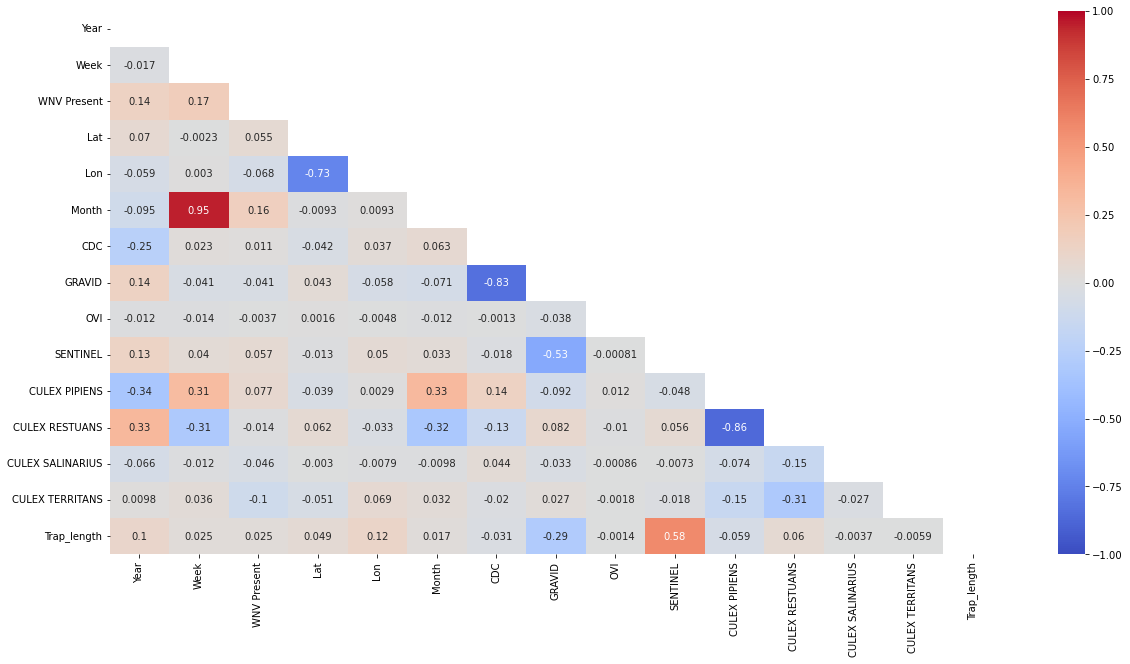

In [574]:
# Correlation of the variables in a heatmap
plt.figure(figsize=(20,10))


matrix = np.triu(X.corr())


sns.heatmap(X.corr(), annot=True, mask=matrix, cmap='coolwarm', vmin = -1.0, vmax = 1.0)
plt.show()

I put this heatmap again to check the features we selected in our last model.

| Model | R^2 | P<0.5 |
| --- | --- | --- |
| 3.1.1 | 0.156 | No |
| 3.1.2 | 0.156 | No |
| 3.1.3 | 0.059 | No |
| 3.1.4 | 0.059 | Yes |
| 3.2.1 | 0.012 | Yes |
| 3.2.2 | 0.022 | Yes |
| 3.2.3 | 0.035 | Yes |
| 3.2.4 | 0.035 | No |
| 3.2.5 | 0.054 | Yes |
| 3.2.6 | 0.057 | Yes |
| 3.2.7 | 0.057 | No |
| 3.2.8 | 0.058 | Yes |
| 3.2.9 | 0.058 | Yes |

However, our best model so far is __Model 3.1.4, with 𝑅2 = 0.059__, which means this model is able to explain 5.9% of the variance.

## Model Diagnostics 

But we still are not finished!

We need to check two of the four assumptions associated with a linear regression model:
3. **Residuals** are normally distributed.**
4. **Homoscedasticity**: The variance of residual is the same for any value of X.**

### 3. Residuals 
- A residual plot can help to visualize whether the error in the model is random or non-random 
- The distribution of the residual values should appear to be normally distributed

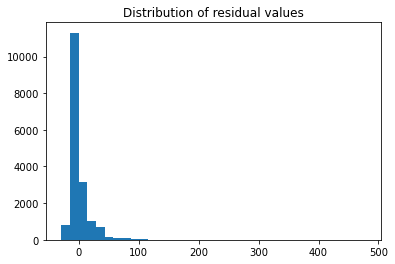

In [576]:
# Plotting the residuals of the model 3.1.4
plt.figure()
plt.hist(my_linreg4.resid, bins = 35)
plt.title('Distribution of residual values')
plt.show()

The distribution of residual values does not appear to be normal distribution. But let's take a look at the Shaprio-Wilk test.

In [577]:
# calculating the shapiro test statisic and its p-value

print("Shapiro-Wilk Test: ", stats.shapiro(my_linreg4.resid))


Shapiro-Wilk Test:  ShapiroResult(statistic=0.5730900168418884, pvalue=0.0)


C:\Users\user\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The null hypothesis for the Shapiro-Wilk test is that the data are normally distributed. 
Because the p-value is less than 0.05, then the null hypothesis that the data are normally distributed is rejected.

The Shapiro-Wilk test is very sensitive! Let's try a normal Q-Q plot.

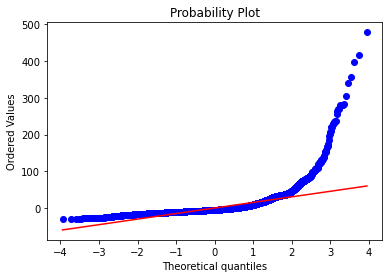

In [578]:
# Normal Q-Q plot

plt.figure()
stats.probplot(my_linreg4.resid, dist="norm", plot = plt);
plt.show()

The residual are in combination with the theoretical quantiles till theoretical quantile is exceeds 2. __After it doesn't follow a normal distribution.__

### 4. Homoscedasticity

The variance of residual is the same .

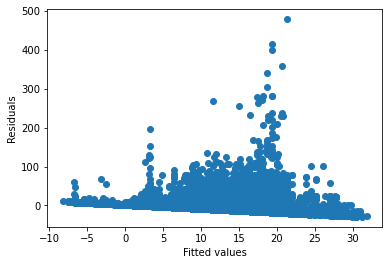

In [579]:
# Plot the residuals and the predicted values
plt.figure()
plt.scatter(my_linreg4.fittedvalues, my_linreg4.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

There isn't a particular pattern in the plot of the residuals, the residuals do look somewhat clustered together though which might suggest that there are some outliers that affected our model. More investigation would be needed in terms of that.

## Conclusion
The approach we have shown above for variable selection is, stepwise selection, where variables are added to and subtracted from the model one at a time and then the models are compared with specific performance criterion/s (in this case, we have used $R^2$). <br>

We would describe what we have done in Model 3.1.1, 3.1.2, 3.1.3 and 3.1.4 as **backward selection**, fitting a full model and slowly remove terms one at a time, starting with the term with the least statistical signficance. An alternative to backward selection is **forward selection**, which can be seen in Model 3.2.1 to 3.2.9. Instead of starting with a full model, we start with a model containing only the intercept and a variable the most correlated with the dependent variable.

| Model 3.1.4 | --- | 
| --- | --- | 
| Feature | Coef |
| Year | 0.6139 | 
| Lat | -8.6137 | 
| Lon | -39.3998 | 
| Month | -0.6887 | 
| CDC | -2147.7775 | 
| GRAVID | -2161.3833 | 
| OVI | -2172.4069 | 
| SENTINEL | -2147.5552 | 
| CULEX PIPIENS | -2151.8803 | 
| CULEX RESTUANS | -2153.0299 | 
| CULEX SALINARIUS | -2162.5094 |
| CULEX TERRITANS | -2161.7103 |  

## Model's limitation and results

1. There is not enough sample size that we could have normal distribution for coulmns in the dataset.


2. R2 values of any of the regression model we made above is too low and thus explains low variance for our model. This means that we have lot of points scattered around the prediction line and thus decreasing the level of accuracy for our model and our confidence.


3. As our distributions are not normal for all the features, confidence decreases by this limitation too.


4. Residuals are normally distributed till some point as seen in the Q-Q plot but differ a lot after that. This is because our variance is small and lot of points scattered around prediction line.


5. Homoscedasticity assumption proves to be right though I think points make some clusters in a specific area of the graph.


6. In Model 3.1.4, that is our final model, all the features except Year, we have negative coefficients which means that for every increase in the mosquito number their coefficients will go down.


7. Year column, though it has a positive coeeficient, it is barely above zero and relatively very small compared to the other features.


8. One more thing to note here is that this model, had correlations in features as can be seen from the heatmap, but those were not significant enough as can be seen from the OLS model.

Since our dependent variable, mosquito number is dependent upon multiple features it's hard to draw a linear graph for it. However, equation can be made with the help of coefficints and constants in OLS model in Model 3.1.4


---

---

### Question 2: Run a logistic regression to determine how the independent variables affect West Nile Virus presence. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.
<a class ='anchor' id = 'Que3.2' ></a>

In [582]:
stat_df3 = stat_df2.drop(['Trap type'], axis=1)
stat_df3.head()

,Year,Week,Trap,Date,WNV Present,Species,Lat,Lon,Address Block,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL
0,2007,21,T002,2007-05-29 00:05:00,0,CULEX RESTUANS,41.956299,-87.797517,41XX N OAK PARK AVE,5,1,0,1,0,0
1,2007,21,T007,2007-05-29 00:05:00,0,CULEX RESTUANS,41.995492,-87.769609,62XX N MANDELL AVE,5,1,1,0,0,0
2,2007,21,T015,2007-05-29 00:05:00,0,CULEX RESTUANS,41.974183,-87.825241,79XX W FOSTER AVE,5,4,0,1,0,0
3,2007,21,T045,2007-05-29 00:05:00,0,CULEX RESTUANS,41.921705,-87.666963,15XX W WEBSTER AVE,5,2,0,1,0,0
4,2007,21,T046,2007-05-29 00:05:00,0,CULEX RESTUANS,41.892220,-87.691698,25XX W GRAND AVE,5,1,1,0,0,0


In [595]:
stat_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17391 entries, 0 to 17390
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             17391 non-null  int64  
 1   Week             17391 non-null  int64  
 2   Trap             17391 non-null  object 
 3   WNV Present      17391 non-null  int32  
 4   Species          17391 non-null  object 
 5   Lat              17391 non-null  float64
 6   Lon              17391 non-null  float64
 7   Address Block    17391 non-null  object 
 8   Month            17391 non-null  int64  
 9   Mosquito number  17391 non-null  int64  
 10  CDC              17391 non-null  uint8  
 11  GRAVID           17391 non-null  uint8  
 12  OVI              17391 non-null  uint8  
 13  SENTINEL         17391 non-null  uint8  
dtypes: float64(2), int32(1), int64(4), object(3), uint8(4)
memory usage: 1.3+ MB


### Date

In [584]:
## convert type of date column from object to datetime column
stat_df3['Date'] = stat_df3['Date'].apply(pd.to_datetime)
display(stat_df3.dtypes)  

Year                        int64
Week                        int64
Trap                       object
Date               datetime64[ns]
WNV Present                 int32
Species                    object
Lat                       float64
Lon                       float64
Address Block              object
Month                       int64
Mosquito number             int64
CDC                         uint8
GRAVID                      uint8
OVI                         uint8
SENTINEL                    uint8
dtype: object

Anyways we dont need date column because we have columns week, year and month in our dataframe. And we can also see that time enetered in the dataset does not have perfect entries. 

So, let's drop the date column.

In [585]:
stat_df3.drop(columns = 'Date',inplace = True)

In [586]:
#check
stat_df3.head()

,Year,Week,Trap,WNV Present,Species,Lat,Lon,Address Block,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL
0,2007,21,T002,0,CULEX RESTUANS,41.956299,-87.797517,41XX N OAK PARK AVE,5,1,0,1,0,0
1,2007,21,T007,0,CULEX RESTUANS,41.995492,-87.769609,62XX N MANDELL AVE,5,1,1,0,0,0
2,2007,21,T015,0,CULEX RESTUANS,41.974183,-87.825241,79XX W FOSTER AVE,5,4,0,1,0,0
3,2007,21,T045,0,CULEX RESTUANS,41.921705,-87.666963,15XX W WEBSTER AVE,5,2,0,1,0,0
4,2007,21,T046,0,CULEX RESTUANS,41.892220,-87.691698,25XX W GRAND AVE,5,1,1,0,0,0


### Species

In [587]:
# Check all distinct values for species column
stat_df3['Species'].value_counts()

CULEX RESTUANS      11063
CULEX PIPIENS        5192
CULEX TERRITANS       914
CULEX SALINARIUS      222
Name: Species, dtype: int64

In [588]:
# Try
dum_species = pd.get_dummies(stat_df3['Species'])
dum_species.head()

,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [589]:
stat6_df = pd.concat([stat_df3, dum_species], axis=1)

In [590]:
#check
stat6_df.head()

,Year,Week,Trap,WNV Present,Species,Lat,Lon,Address Block,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2007,21,T002,0,CULEX RESTUANS,41.956299,-87.797517,41XX N OAK PARK AVE,5,1,0,1,0,0,0,1,0,0
1,2007,21,T007,0,CULEX RESTUANS,41.995492,-87.769609,62XX N MANDELL AVE,5,1,1,0,0,0,0,1,0,0
2,2007,21,T015,0,CULEX RESTUANS,41.974183,-87.825241,79XX W FOSTER AVE,5,4,0,1,0,0,0,1,0,0
3,2007,21,T045,0,CULEX RESTUANS,41.921705,-87.666963,15XX W WEBSTER AVE,5,2,0,1,0,0,0,1,0,0
4,2007,21,T046,0,CULEX RESTUANS,41.892220,-87.691698,25XX W GRAND AVE,5,1,1,0,0,0,0,1,0,0


In [591]:
# lets drop the species column from our dataframe
stat7_df = stat6_df.drop('Species', axis=1)
stat7_df.head()

,Year,Week,Trap,WNV Present,Lat,Lon,Address Block,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2007,21,T002,0,41.956299,-87.797517,41XX N OAK PARK AVE,5,1,0,1,0,0,0,1,0,0
1,2007,21,T007,0,41.995492,-87.769609,62XX N MANDELL AVE,5,1,1,0,0,0,0,1,0,0
2,2007,21,T015,0,41.974183,-87.825241,79XX W FOSTER AVE,5,4,0,1,0,0,0,1,0,0
3,2007,21,T045,0,41.921705,-87.666963,15XX W WEBSTER AVE,5,2,0,1,0,0,0,1,0,0
4,2007,21,T046,0,41.892220,-87.691698,25XX W GRAND AVE,5,1,1,0,0,0,0,1,0,0


In [596]:
#let's check which other columnns are left
stat7_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17391 entries, 0 to 17390
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              17391 non-null  int64  
 1   Week              17391 non-null  int64  
 2   Trap              17391 non-null  object 
 3   WNV Present       17391 non-null  int32  
 4   Lat               17391 non-null  float64
 5   Lon               17391 non-null  float64
 6   Address Block     17391 non-null  object 
 7   Month             17391 non-null  int64  
 8   Mosquito number   17391 non-null  int64  
 9   CDC               17391 non-null  uint8  
 10  GRAVID            17391 non-null  uint8  
 11  OVI               17391 non-null  uint8  
 12  SENTINEL          17391 non-null  uint8  
 13  CULEX PIPIENS     17391 non-null  uint8  
 14  CULEX RESTUANS    17391 non-null  uint8  
 15  CULEX SALINARIUS  17391 non-null  uint8  
 16  CULEX TERRITANS   17391 non-null  uint8 

Let's see the year coulmn

### Year

In [597]:
stat7_df['Year'].value_counts()

2007    2016
2014    1913
2016    1641
2013    1501
2010    1330
2012    1308
2018    1244
2019    1164
2009    1118
2015    1094
2011    1068
2017    1017
2008     977
Name: Year, dtype: int64

Seeing the above counts, it has different numbers, let's check with a bar graph

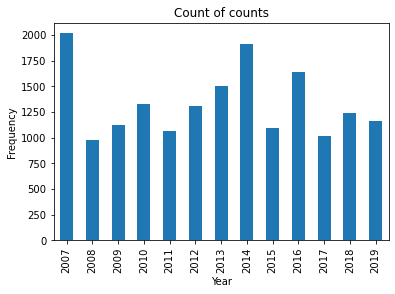

In [598]:
stat7_df['Year'].value_counts().sort_index().plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Year')
plt.title('Count of counts')
plt.show()

From the above graph it can be seen that there are total of 13 continuous years in the data set. They have a varied frequency and not inclined towards any one side. So let's keep it in this way only.

In [599]:
#check
stat7_df.head()

,Year,Week,Trap,WNV Present,Lat,Lon,Address Block,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2007,21,T002,0,41.956299,-87.797517,41XX N OAK PARK AVE,5,1,0,1,0,0,0,1,0,0
1,2007,21,T007,0,41.995492,-87.769609,62XX N MANDELL AVE,5,1,1,0,0,0,0,1,0,0
2,2007,21,T015,0,41.974183,-87.825241,79XX W FOSTER AVE,5,4,0,1,0,0,0,1,0,0
3,2007,21,T045,0,41.921705,-87.666963,15XX W WEBSTER AVE,5,2,0,1,0,0,0,1,0,0
4,2007,21,T046,0,41.892220,-87.691698,25XX W GRAND AVE,5,1,1,0,0,0,0,1,0,0


From above columns address block and lat, lon represent the exact same information. So it's better to drop address block column column and then deal with lat and lon.

One other thing could be done to separate address block into address and block and then drop the address column and then proceed further.

Let's split the address block column.

### Address Block

In [600]:
# Apply split using an accessor
# new data frame with split value columns
new = stat7_df["Address Block"].str.split(" ", n = 1, expand = True)
 
# making separate first name column from new data frame
stat7_df["Block"]= new[0]
 
# making separate last name column from new data frame
stat7_df["Address"]= new[1]
 
# Dropping old Name columns
stat7_df.drop(columns =["Address Block"], inplace = True)
 
# df display
stat7_df.head()

,Year,Week,Trap,WNV Present,Lat,Lon,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,Block,Address
0,2007,21,T002,0,41.956299,-87.797517,5,1,0,1,0,0,0,1,0,0,41XX,N OAK PARK AVE
1,2007,21,T007,0,41.995492,-87.769609,5,1,1,0,0,0,0,1,0,0,62XX,N MANDELL AVE
2,2007,21,T015,0,41.974183,-87.825241,5,4,0,1,0,0,0,1,0,0,79XX,W FOSTER AVE
3,2007,21,T045,0,41.921705,-87.666963,5,2,0,1,0,0,0,1,0,0,15XX,W WEBSTER AVE
4,2007,21,T046,0,41.892220,-87.691698,5,1,1,0,0,0,0,1,0,0,25XX,W GRAND AVE


In [601]:
# lets drop the address column from our dataframe
stat8_df = stat7_df.drop('Address', axis=1)
stat8_df.head()

,Year,Week,Trap,WNV Present,Lat,Lon,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,Block
0,2007,21,T002,0,41.956299,-87.797517,5,1,0,1,0,0,0,1,0,0,41XX
1,2007,21,T007,0,41.995492,-87.769609,5,1,1,0,0,0,0,1,0,0,62XX
2,2007,21,T015,0,41.974183,-87.825241,5,4,0,1,0,0,0,1,0,0,79XX
3,2007,21,T045,0,41.921705,-87.666963,5,2,0,1,0,0,0,1,0,0,15XX
4,2007,21,T046,0,41.892220,-87.691698,5,1,1,0,0,0,0,1,0,0,25XX


In [602]:
stat8_df['Block'].value_counts()

100XX    1603
22XX      706
58XX      616
70XX      607
11XX      564
         ... 
80XX        5
29XX        2
112XX       2
88XX        2
54XX        1
Name: Block, Length: 87, dtype: int64

As seen from above there are 87 different kinds of blocks accross different samples of mosquitoes and traps were spread.

Let's plot these on a bar graph.

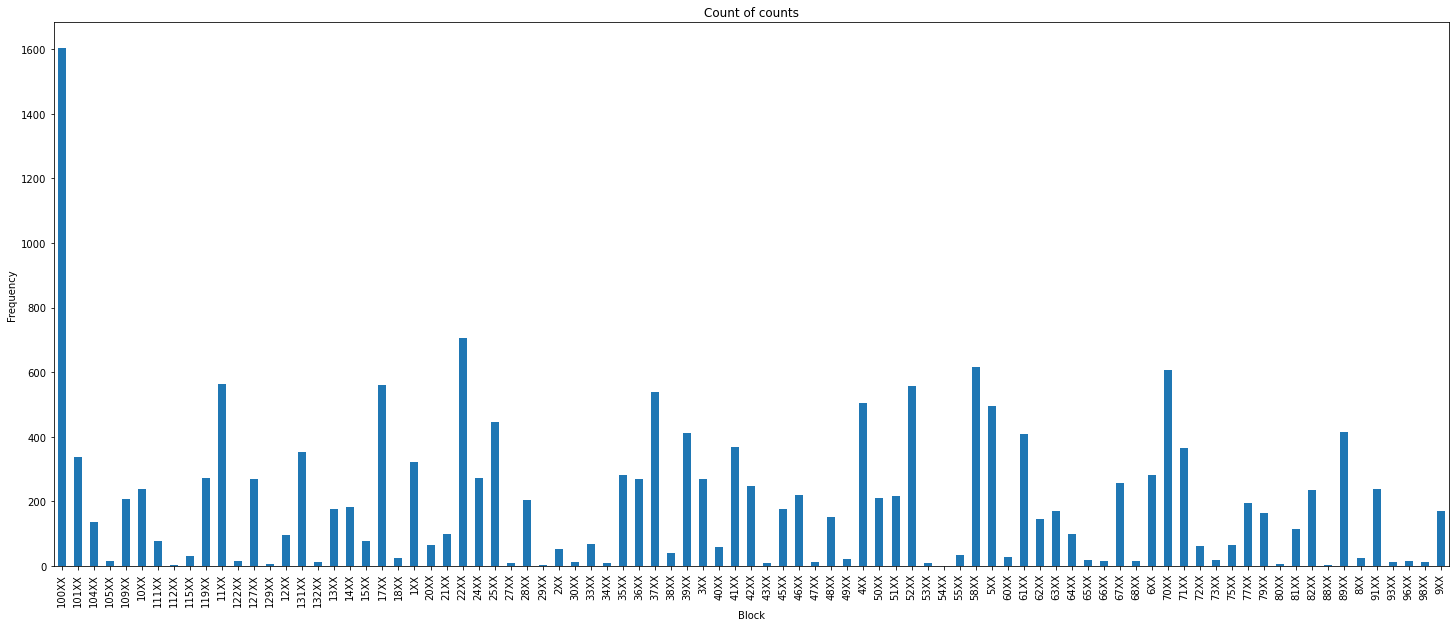

In [603]:
plt.figure(figsize=(25, 10))
stat8_df['Block'].value_counts().sort_index().plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Block')
plt.title('Count of counts')
plt.show()

This is a varied distribution of the blocks around the City of Chicago. Considerably block number 100 has the most appearances in the dataset.

As such it gives the same information as lat and lon we can drop it or the other possible way drop lat and lon and make make groups/clusters of the blocks.

Either way clusters have to be made, so let's drop the block column and deal with lat and lon.

In [604]:
# lets drop the block column from our dataframe
stat9_df = stat8_df.drop('Block', axis=1)
stat9_df.head()

,Year,Week,Trap,WNV Present,Lat,Lon,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2007,21,T002,0,41.956299,-87.797517,5,1,0,1,0,0,0,1,0,0
1,2007,21,T007,0,41.995492,-87.769609,5,1,1,0,0,0,0,1,0,0
2,2007,21,T015,0,41.974183,-87.825241,5,4,0,1,0,0,0,1,0,0
3,2007,21,T045,0,41.921705,-87.666963,5,2,0,1,0,0,0,1,0,0
4,2007,21,T046,0,41.892220,-87.691698,5,1,1,0,0,0,0,1,0,0


Lets see if we have traps of satellite type as we had in the previos assignment.

### Trap

In [605]:
stat9_df['Trap_length'] = stat9_df['Trap'].apply(len)
stat9_df.head()

,Year,Week,Trap,WNV Present,Lat,Lon,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,Trap_length
0,2007,21,T002,0,41.956299,-87.797517,5,1,0,1,0,0,0,1,0,0,4
1,2007,21,T007,0,41.995492,-87.769609,5,1,1,0,0,0,0,1,0,0,4
2,2007,21,T015,0,41.974183,-87.825241,5,4,0,1,0,0,0,1,0,0,4
3,2007,21,T045,0,41.921705,-87.666963,5,2,0,1,0,0,0,1,0,0,4
4,2007,21,T046,0,41.892220,-87.691698,5,1,1,0,0,0,0,1,0,0,4


In [606]:
#lets check the counts of trap
stat9_df['Trap'].value_counts()

T002     367
T031     332
T114     322
T008     310
T151     297
        ... 
T241       1
T167       1
T135B      1
T128A      1
T040       1
Name: Trap, Length: 190, dtype: int64

We can see that there are 190 different distinct traps, which will make our data set quite huge if we created dummy varibales for each of this. Ideally, we would classify them into satellite and non-satellite traps and then make a model considering this.

In [607]:
#lets check the counts of trap_length
stat9_df['Trap_length'].value_counts()

4    16819
5      572
Name: Trap_length, dtype: int64

So we have 586 number of satellite traps and 17,251 number of non-satellite traps.

Let's drop the trap column.

In [608]:
# lets drop the trap column from our dataframe
stat10_df = stat9_df.drop('Trap', axis=1)
stat10_df.head()

,Year,Week,WNV Present,Lat,Lon,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,Trap_length
0,2007,21,0,41.956299,-87.797517,5,1,0,1,0,0,0,1,0,0,4
1,2007,21,0,41.995492,-87.769609,5,1,1,0,0,0,0,1,0,0,4
2,2007,21,0,41.974183,-87.825241,5,4,0,1,0,0,0,1,0,0,4
3,2007,21,0,41.921705,-87.666963,5,2,0,1,0,0,0,1,0,0,4
4,2007,21,0,41.892220,-87.691698,5,1,1,0,0,0,0,1,0,0,4


In [609]:
stat10_df.dtypes

Year                  int64
Week                  int64
WNV Present           int32
Lat                 float64
Lon                 float64
Month                 int64
Mosquito number       int64
CDC                   uint8
GRAVID                uint8
OVI                   uint8
SENTINEL              uint8
CULEX PIPIENS         uint8
CULEX RESTUANS        uint8
CULEX SALINARIUS      uint8
CULEX TERRITANS       uint8
Trap_length           int64
dtype: object

In [610]:
## lets check about week
stat10_df['Week'].value_counts()

32    1535
33    1481
31    1448
30    1324
34    1226
29    1181
28    1147
35    1036
36     930
27     888
37     818
24     761
26     759
25     743
38     662
23     588
39     584
22     128
21      77
40      47
20      28
Name: Week, dtype: int64

Let's keep the week column like this only as there is quite varied distribution.

### Model

Now that we have all numeric data, we are ready to apply a statistical model. As we identified earlier this is a binary classification problem (0/1) where 0 represents WNV is not present and 1 represent WNV is present.

Therefore, the appropriate type of model to apply is __logistic regression__ as it predicts a binary categorical outcome.

In [611]:
# Pull out the X and y
X = stat10_df.drop('WNV Present', axis=1)
y = stat10_df['WNV Present'].copy()

In [612]:
X

,Year,Week,Lat,Lon,Month,Mosquito number,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,Trap_length
0,2007,21,41.956299,-87.797517,5,1,0,1,0,0,0,1,0,0,4
1,2007,21,41.995492,-87.769609,5,1,1,0,0,0,0,1,0,0,4
2,2007,21,41.974183,-87.825241,5,4,0,1,0,0,0,1,0,0,4
3,2007,21,41.921705,-87.666963,5,2,0,1,0,0,0,1,0,0,4
4,2007,21,41.892220,-87.691698,5,1,1,0,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17386,2019,39,42.010643,-87.806797,9,2,0,1,0,0,0,1,0,0,4
17387,2019,39,41.994966,-87.770837,9,3,0,1,0,0,0,1,0,0,4
17388,2019,39,41.918676,-87.664374,9,1,0,1,0,0,0,1,0,0,4
17389,2019,39,41.791690,-87.781636,9,1,0,1,0,0,0,1,0,0,4


In [613]:
y

0        0
1        0
2        0
3        0
4        0
        ..
17386    0
17387    0
17388    0
17389    0
17390    0
Name: WNV Present, Length: 17391, dtype: int32

Before we move forward, we will check that the predictors do not show collinearity and multicollinearity which is a prerequisite of applying logistic regression.

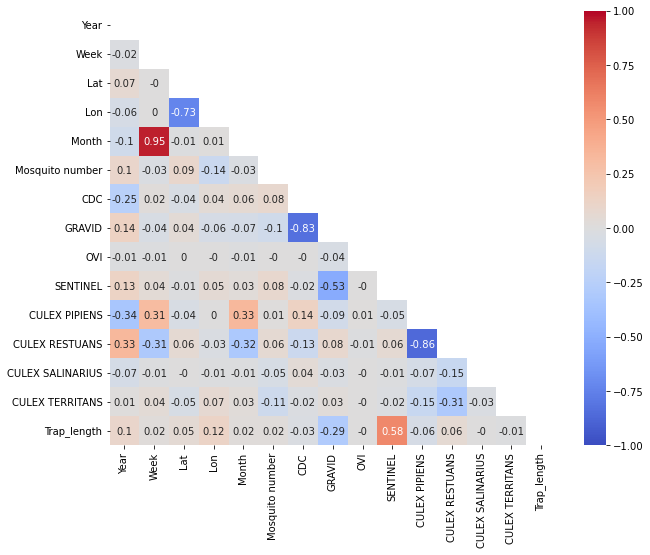

In [614]:
# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

From the above heat map 4 boxes appear to be darkest which means they are highly collinear (postive and negative) with the corresponding columns. Lets pick one of these and drop one of the columns and check the collinearity again.

Month and Week have a high positive correlation and let's drop one of this.

In [615]:
# Drop the identified columns
X.drop('Month', axis=1, inplace=True)
#here I drop month as it would make more sense to keep week column and have a detailed information.

Let's check the correlation again in the independent variables.

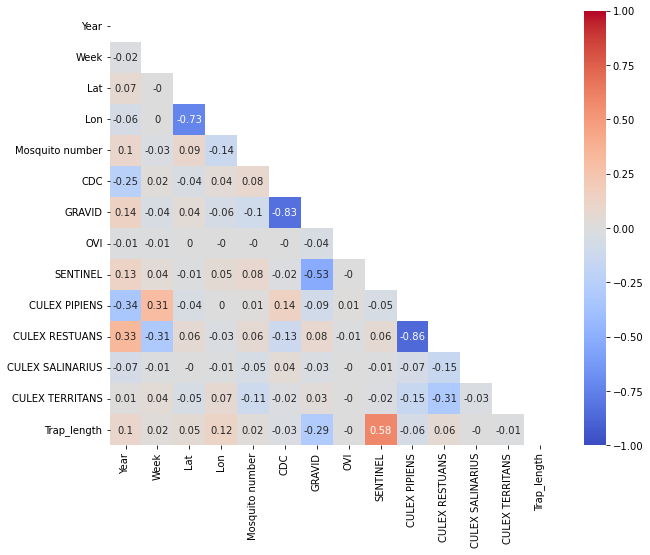

In [616]:
# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

Let's address CDC and GRAVID now as thier negative correlation is highest now.

In [617]:
X[['GRAVID', 'CDC', 'SENTINEL', 'OVI']].sum()

GRAVID      16719
CDC           474
SENTINEL      197
OVI             1
dtype: int64

There appears to be more variation in all the trap types. Therefore we will opt to keep GRAVID and remove the CDC column from a data standpoint. However I would note, that in other circumstances, there may be a business justification to keep one or the other.

In [618]:
# Drop the identified columns
X.drop('CDC', axis=1, inplace=True)

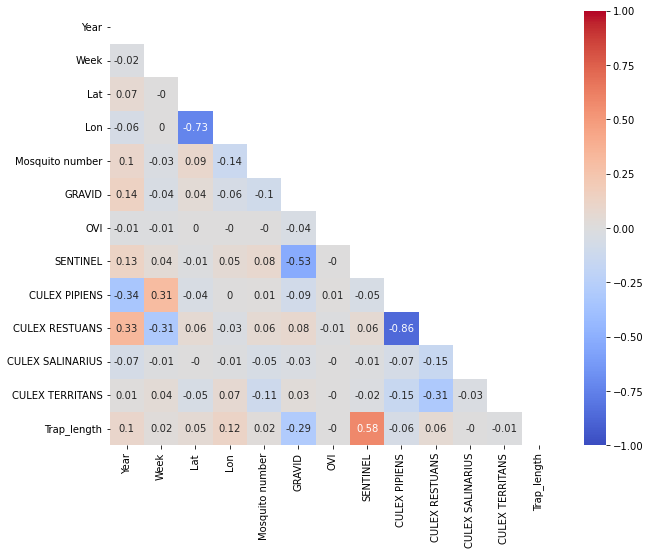

In [619]:
# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

CULEX PIPIENS and CULEX RESTUANS have high collinearity now. Let's address these 2 columnns but it is quite weird that heatmap barely changes as we dropped 2 columns before this.

In [620]:
X[['CULEX PIPIENS', 'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TERRITANS']].sum()

CULEX PIPIENS        5192
CULEX RESTUANS      11063
CULEX SALINARIUS      222
CULEX TERRITANS       914
dtype: int64

Seeing the above variation, let's drop CULEX PIPIENS

In [621]:
# Drop the identified columns
X.drop('CULEX PIPIENS', axis=1, inplace=True)

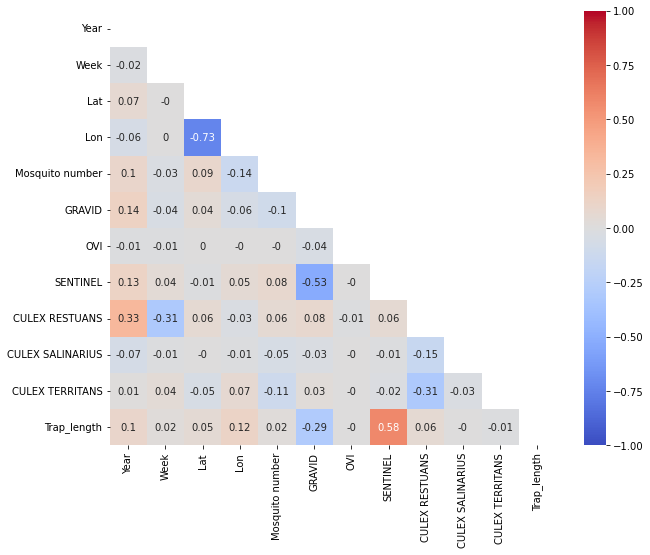

In [622]:
# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

In [623]:
# Drop the identified columns
X.drop('Lon', axis=1, inplace=True)

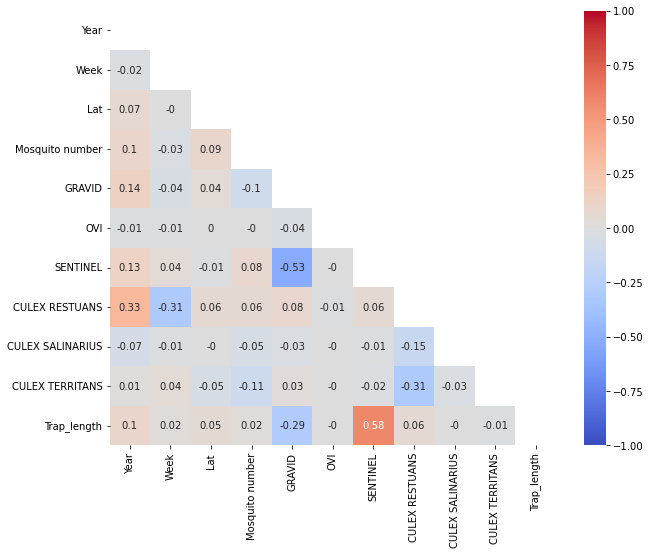

In [624]:
# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

Looking at the above, we see now that all correlations are 0.5 or below. We state this to be addressing collinearity in the dataset to a sufficient degree and now can continue to the modeling.

***NOTE:*** We have checked for collinearity being present in the independent variables by performing a correlation analysis. Note that this does not exclude the existence of *multi-*collinearity. To properly check for this, we would need to employ other techniques, in particular looking at Variance Inflation Factor (VIF).

### VIF

In [625]:
# Calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [626]:
X_withconst = sm.add_constant(X)

sm.OLS(y, X_withconst).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WNV Present   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     316.7
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:41:04   Log-Likelihood:                -6771.9
No. Observations:               17391   AIC:                         1.357e+04
Df Residuals:                   17379   BIC:                         1.366e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -29.3678      1.868    -15.724      0.000     -33.029     -25.707
Year                 0.0132      0.001     16.263      0.000       0.012       0.015
Week                 0.0151      0.001     22.975      0.000       0.014       0.016
Lat                  0.0627      0.024      2.620      0.009       0.016       0.110
Mosquito number      0.0060      0.000     44.668      0.000       0.006       0.006
GRAVID              -0.0185      0.017     -1.067      0.286      -0.052       0.015
OVI                  0.0153      0.358      0.043      0.966      -0.686       0.717
SENTINEL             0.0340      0.036      0.938      0.348      -0.037       0.105
CULEX RESTUANS      -0.0448      0.007     -6.561      0.000      -0.058      -0.031
CULEX SALINARIUS    -0.1039      0.025     -4.225      0.000      -0.152      -0.056
CULEX TERRITANS     -0.1644      0.013    -12.582      0.000      -0.190      -0.139
Trap_length         -0.0107      0.019     -0.572      0.568      -0.047       0.026
==============================================================================
Omnibus:                     2896.886   Durbin-Watson:                   0.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4554.621
Skew:                           1.211   Prob(JB):                         0.00
Kurtosis:                       3.649   Cond. No.                     1.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [627]:
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)[1:]

Week                    57.601393
Lat                 102869.335046
Mosquito number          1.352706
GRAVID                  37.736976
OVI                      1.002526
SENTINEL                 1.986182
CULEX RESTUANS           3.679240
CULEX SALINARIUS         1.051415
CULEX TERRITANS          1.210209
Trap_length            774.445863
dtype: float64

A high VIF means that the independent variable in question has a higher level of colinearity with the other independent variables.

An obvious step would be to just drop the columns with the highest VIF numbers. One thing to note however is that dropping one variable will change the VIFs for *all the independent variables*.

Lets check the VIFs after dropping Lat.

In [628]:
# drop lat
X_new = X.drop('Lat', axis=1)

# add constant
X_new_withconst = sm.add_constant(X_new)

#calculate VIF
pd.Series([variance_inflation_factor(X_new_withconst.values, i) 
               for i in range(X_new_withconst.shape[1])], 
              index=X_new_withconst.columns)[1:] # leaving out the constant

Year                1.241555
Week                1.134559
Mosquito number     1.041748
GRAVID              1.516535
OVI                 1.002470
SENTINEL            2.003442
CULEX RESTUANS      1.470912
CULEX SALINARIUS    1.038042
CULEX TERRITANS     1.156778
Trap_length         1.504688
dtype: float64

The remaining columns have seen their VIFs drop substantially!

This result is pretty important. It means that we can reduce VIFs without having to drop a variable we think will be useful for predicting the dependent. Instead, drop a different variable which has high correlation with the variable we want to keep. Let's refit our model from above but without the Lat variable.

In [630]:
# fit model without Lat

sm.OLS(y, X_new_withconst).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WNV Present   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     347.5
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:03:44   Log-Likelihood:                -6775.4
No. Observations:               17391   AIC:                         1.357e+04
Df Residuals:                   17380   BIC:                         1.366e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -26.9359      1.621    -16.616      0.000     -30.113     -23.759
Year                 0.0132      0.001     16.382      0.000       0.012       0.015
Week                 0.0152      0.001     23.008      0.000       0.014       0.016
Mosquito number      0.0060      0.000     45.034      0.000       0.006       0.006
GRAVID              -0.0170      0.017     -0.982      0.326      -0.051       0.017
OVI                  0.0196      0.358      0.055      0.956      -0.682       0.721
SENTINEL             0.0302      0.036      0.834      0.404      -0.041       0.101
CULEX RESTUANS      -0.0443      0.007     -6.492      0.000      -0.058      -0.031
CULEX SALINARIUS    -0.1033      0.025     -4.199      0.000      -0.151      -0.055
CULEX TERRITANS     -0.1655      0.013    -12.670      0.000      -0.191      -0.140
Trap_length         -0.0073      0.019     -0.393      0.695      -0.044       0.029
==============================================================================
Omnibus:                     2893.694   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4547.486
Skew:                           1.210   Prob(JB):                         0.00
Kurtosis:                       3.650   Cond. No.                     1.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

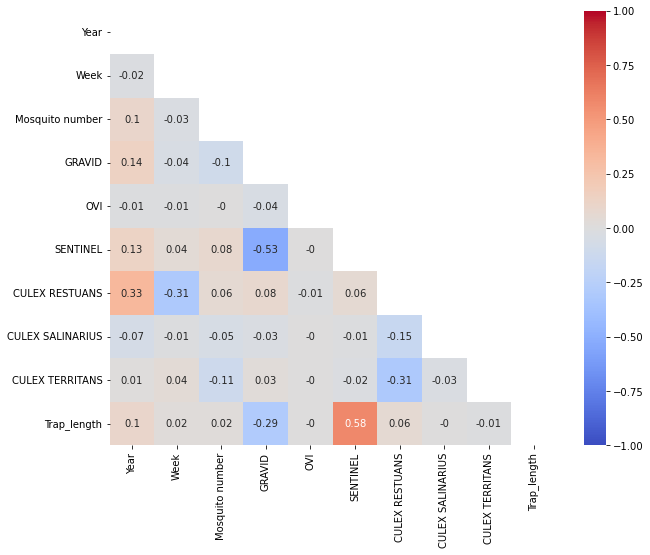

In [647]:
# Calculate all the correlations between each independent variable
corr_df = X_new.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

### Backward Selection

In backward selection, we fit a model with all data available to us to start, then remove variables based upon whether or not they are significant (and informed by subject matter knowledge), until will reach a model of desired simplicity with sufficient predictive power.

In [631]:
# FINALLY - let's try fitting a model and check the result!
import statsmodels.api as sm

# 0. ADD THE CONSTANT!
X_const = sm.add_constant(X)

# 1. Instantiate the model
bank_logit = sm.Logit(y, X_const)

# 2. Fit the model to the data
bank_logit_fitted = bank_logit.fit()

# 3. Look at the results / summary table / assess model fit
bank_logit_fitted.summary()

Optimization terminated successfully.
         Current function value: 0.395226
         Iterations 22


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17391
Model:                          Logit   Df Residuals:                    17379
Method:                           MLE   Df Model:                           11
Date:                Sun, 23 Oct 2022   Pseudo R-squ.:                  0.1842
Time:                        23:09:44   Log-Likelihood:                -6873.4
converged:                       True   LL-Null:                       -8424.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -251.2964     16.082    -15.626      0.000    -282.817    -219.775
Year                 0.1124      0.007     15.936      0.000       0.099       0.126
Week                 0.1350      0.006     23.330      0.000       0.124       0.146
Lat                  0.4588      0.193      2.383      0.017       0.081       0.836
Mosquito number      0.0459      0.001     35.630      0.000       0.043       0.048
GRAVID              -0.0314      0.145     -0.217      0.829      -0.316       0.253
OVI               -695.7504  7.39e+151 -9.42e-150      1.000  -1.45e+152   1.45e+152
SENTINEL            -0.0993      0.270     -0.368      0.713      -0.628       0.429
CULEX RESTUANS      -0.3306      0.053     -6.251      0.000      -0.434      -0.227
CULEX SALINARIUS    -1.4906      0.392     -3.801      0.000      -2.259      -0.722
CULEX TERRITANS     -2.6052      0.274     -9.503      0.000      -3.142      -2.068
Trap_length         -0.0596      0.154     -0.386      0.699      -0.362       0.243
====================================================================================
"""

We note above, that for many variables, the associated p-values with the coefficients (the betas) are large. Therefore, we cannot safely reject the null hypothesis ($\beta_i = 0$), so in pratical terms, these independent variables are likely not predictive of the dependent variable. We try excluding these from the model and seeing if this has an effect or not. Note that removing many variables at once is to be avoided, as the p-values will vary based upon which are left in or out of the model together in combination.

Regardless of this fact, we can still make a prediction for y. We will do this leaving in the insignificant variables to establish a baseline accuracy:

In [632]:
# Calculate soft predictions
y_proba = bank_logit_fitted.predict(X_const)

# Convert soft predictions to hard predictions 0/1
y_pred = np.where(y_proba >= 0.5, 1, 0)

# Calculate # correct
num_correct = (y_pred == y).sum()

# Calculate the percentage accuracy
pct_accuracy = num_correct/X.shape[0]

print(f'The baseline model accuracy is {np.round(pct_accuracy*100.0, 3)}%')

The baseline model accuracy is 82.508%


We see that the p-value for OVI is very large (~1.0). Additionally, the quantity of total OVI trap type is not much. Therefore we elect to drop this variable from our model and see the effect on the result.

In [633]:
# Drop OVI
X2 = X.drop('OVI', axis=1)

In [634]:
import statsmodels.api as sm

# 0. ADD THE CONSTANT!
X_const2 = sm.add_constant(X2)

# 1. Instantiate the model
bank_logit2 = sm.Logit(y, X_const2)

# 2. Fit the model to the data
bank_logit_fitted2 = bank_logit2.fit()

# 3. Look at the results / summary table / assess model fit
bank_logit_fitted2.summary()

Optimization terminated successfully.
         Current function value: 0.395228
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17391
Model:                          Logit   Df Residuals:                    17380
Method:                           MLE   Df Model:                           10
Date:                Sun, 23 Oct 2022   Pseudo R-squ.:                  0.1842
Time:                        23:10:31   Log-Likelihood:                -6873.4
converged:                       True   LL-Null:                       -8424.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -251.2918     16.082    -15.625      0.000    -282.813    -219.771
Year                 0.1124      0.007     15.936      0.000       0.099       0.126
Week                 0.1351      0.006     23.333      0.000       0.124       0.146
Lat                  0.4587      0.193      2.383      0.017       0.081       0.836
Mosquito number      0.0459      0.001     35.632      0.000       0.043       0.048
GRAVID              -0.0309      0.145     -0.213      0.831      -0.315       0.253
SENTINEL            -0.0988      0.270     -0.366      0.714      -0.627       0.430
CULEX RESTUANS      -0.3305      0.053     -6.250      0.000      -0.434      -0.227
CULEX SALINARIUS    -1.4905      0.392     -3.800      0.000      -2.259      -0.722
CULEX TERRITANS     -2.6051      0.274     -9.503      0.000      -3.142      -2.068
Trap_length         -0.0596      0.154     -0.386      0.699      -0.362       0.243
====================================================================================
"""

Let's drop the Trap length column, it has p-value almost 0.7

In [635]:
X2.drop('Trap_length', inplace=True, axis=1)

In [636]:
# 0. ADD THE CONSTANT!
X_const2 = sm.add_constant(X2)

# 1. Instantiate the model
bank_logit2 = sm.Logit(y, X_const2)

# 2. Fit the model to the data
bank_logit_fitted2 = bank_logit2.fit()

# 3. Look at the results / summary table / assess model fit
bank_logit_fitted2.summary()

Optimization terminated successfully.
         Current function value: 0.395232
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17391
Model:                          Logit   Df Residuals:                    17381
Method:                           MLE   Df Model:                            9
Date:                Sun, 23 Oct 2022   Pseudo R-squ.:                  0.1842
Time:                        23:10:49   Log-Likelihood:                -6873.5
converged:                       True   LL-Null:                       -8424.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -251.2873     16.081    -15.626      0.000    -282.806    -219.768
Year                 0.1124      0.007     15.933      0.000       0.099       0.126
Week                 0.1350      0.006     23.330      0.000       0.124       0.146
Lat                  0.4541      0.192      2.363      0.018       0.077       0.831
Mosquito number      0.0459      0.001     35.664      0.000       0.043       0.048
GRAVID              -0.0312      0.145     -0.215      0.830      -0.315       0.253
SENTINEL            -0.1574      0.223     -0.706      0.480      -0.594       0.280
CULEX RESTUANS      -0.3310      0.053     -6.262      0.000      -0.435      -0.227
CULEX SALINARIUS    -1.4915      0.392     -3.803      0.000      -2.260      -0.723
CULEX TERRITANS     -2.6059      0.274     -9.505      0.000      -3.143      -2.069
====================================================================================
"""

In [637]:
# Drop SENTINEL
X3 = X2.drop('SENTINEL', axis=1)

In [638]:
# 0. ADD THE CONSTANT!
X_const2 = sm.add_constant(X3)

# 1. Instantiate the model
bank_logit2 = sm.Logit(y, X_const2)

# 2. Fit the model to the data
bank_logit_fitted2 = bank_logit2.fit()

# 3. Look at the results / summary table / assess model fit
bank_logit_fitted2.summary()

Optimization terminated successfully.
         Current function value: 0.395246
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17391
Model:                          Logit   Df Residuals:                    17382
Method:                           MLE   Df Model:                            8
Date:                Sun, 23 Oct 2022   Pseudo R-squ.:                  0.1841
Time:                        23:11:06   Log-Likelihood:                -6873.7
converged:                       True   LL-Null:                       -8424.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -248.7837     15.674    -15.872      0.000    -279.505    -218.062
Year                 0.1111      0.007     16.274      0.000       0.098       0.125
Week                 0.1349      0.006     23.317      0.000       0.124       0.146
Lat                  0.4520      0.192      2.351      0.019       0.075       0.829
Mosquito number      0.0459      0.001     35.678      0.000       0.043       0.048
GRAVID               0.0363      0.110      0.329      0.742      -0.180       0.252
CULEX RESTUANS      -0.3330      0.053     -6.309      0.000      -0.436      -0.230
CULEX SALINARIUS    -1.4931      0.392     -3.805      0.000      -2.262      -0.724
CULEX TERRITANS     -2.6061      0.274     -9.506      0.000      -3.143      -2.069
====================================================================================
"""

In [639]:
# Drop GRAVID
X4 = X3.drop('GRAVID', axis=1)

In [640]:
# 0. ADD THE CONSTANT!
X_const2 = sm.add_constant(X4)

# 1. Instantiate the model
bank_logit2 = sm.Logit(y, X_const2)

# 2. Fit the model to the data
bank_logit_fitted2 = bank_logit2.fit()

# 3. Look at the results / summary table / assess model fit
bank_logit_fitted2.summary()

Optimization terminated successfully.
         Current function value: 0.395249
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17391
Model:                          Logit   Df Residuals:                    17383
Method:                           MLE   Df Model:                            7
Date:                Sun, 23 Oct 2022   Pseudo R-squ.:                  0.1841
Time:                        23:12:45   Log-Likelihood:                -6873.8
converged:                       True   LL-Null:                       -8424.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -249.4777     15.533    -16.062      0.000    -279.921    -219.034
Year                 0.1114      0.007     16.406      0.000       0.098       0.125
Week                 0.1348      0.006     23.335      0.000       0.123       0.146
Lat                  0.4578      0.191      2.392      0.017       0.083       0.833
Mosquito number      0.0458      0.001     36.206      0.000       0.043       0.048
CULEX RESTUANS      -0.3327      0.053     -6.303      0.000      -0.436      -0.229
CULEX SALINARIUS    -1.4952      0.392     -3.810      0.000      -2.265      -0.726
CULEX TERRITANS     -2.6055      0.274     -9.505      0.000      -3.143      -2.068
====================================================================================
"""

Now it looks perfect in terms of p-values as all the values are now less than 0.05

In [641]:
# Calculate soft predictions
y_proba = bank_logit_fitted2.predict(X_const2)

# Convert soft predictions to hard predictions 0/1
y_pred = np.where(y_proba >= 0.5, 1, 0)

# Calculate # correct
num_correct = (y_pred == y).sum()

# Calculate the percentage accuracy
pct_accuracy = num_correct / X.shape[0]

print(f'The baseline model accuracy is {np.round(pct_accuracy*100.0, 3)}%')

The baseline model accuracy is 82.525%


We have slightly increased our model accuracy from before.


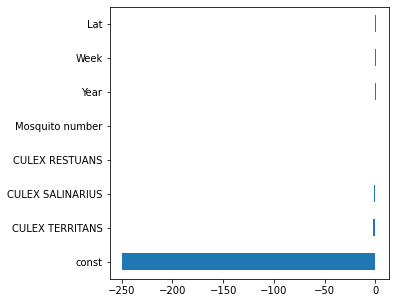

In [642]:
# Model coefficients (i.e. the betas)
plt.figure(figsize=(5,5))
bank_logit_fitted2.params.sort_values().plot(kind='barh')
plt.show()

Looking at the coeffecients or the betas for the columns having pvalue less than 5%, it appears that most of the betas are around zero with constant having highest negative value.


In [655]:
# calculate the co efficients
coefficients_df = pd.DataFrame({"coef": bank_logit_fitted2.params,
                                "p_value": bank_logit_fitted2.pvalues})
coefficients_df.reset_index(inplace=True)


coefficients_df.rename({'index':'variable'}, axis='columns', inplace=True)
coefficients_df

,variable,coef,p_value
0,const,-249.477732,4.744294e-58
1,Year,0.111365,1.739120e-60
2,Week,0.134790,1.956048e-120
3,Lat,0.457806,1.675948e-02
4,Mosquito number,0.045837,4.895770e-287
5,CULEX RESTUANS,-0.332652,2.922198e-10
6,CULEX SALINARIUS,-1.495237,1.392144e-04
7,CULEX TERRITANS,-2.605479,2.007531e-21


From the above table it can be resulted out that the presence of WNV is highly dependent on the species if it is CULEX TERRITANS or not. 

If the mosquito is from CULEX TERRITANS species then most probably it does not have WNV as its coefficient is negative. Same can be seen with CULEX SALINARIUS.

However, geographical location of mosquitoes matters a lot if they have WNV or not. 

In terms of trap type GRAVID is highly indictive feature as it is postively correlated with the presence of mosquitoes caught.

Week, Year and Mosquito number doesn't effect as much as others features in our model.

Even further, we could calculate the log odds for variables of interest and plot this information. 

Let's build a bar chart based on this data. We will convert coefficients into odds increases and decreases, color them in red and blue based on increase or decrease, and change the saturation based on p-values.

In [656]:
categories = []    # Holds labels for bars
sizes = []         # Hold bar heights
colors = []        # Holds bar colors
p_values = []      # Used for additional text within the plot

p_value_color_scale = 1.5

# iterate through
for index, row in coefficients_df.iterrows():
    variable_name = row['variable'].strip()
    
    if (variable_name != 'const'):   # We don't care much for the constant since we can modify it
        
        
        categories.append(variable_name)
        coefficient_value = row['coef']
        
        p_value = round(row['p_value'],2)
        p_values.append(p_value)
        


        color = [1.0,1.0,1.0]
        
        color[1] = (min(p_value_color_scale*p_value, 1.0)/1.0)  # Make GREEN brighter
        
        if (coefficient_value >= 0):
            color[0] = color[1]                     # Make RED brighter
            column_size = np.exp(coefficient_value)
        else:
            color[2] = color[1]                     # Make BLUE brighter
            column_size = -1/np.exp(coefficient_value)

        column_size = round(column_size,2)
        sizes.append(column_size)
        colors.append(color)

Let.'s create a bar chart with some text labels as well. If the p-value is larger than, or equal to, 0.05, we will label that bar.

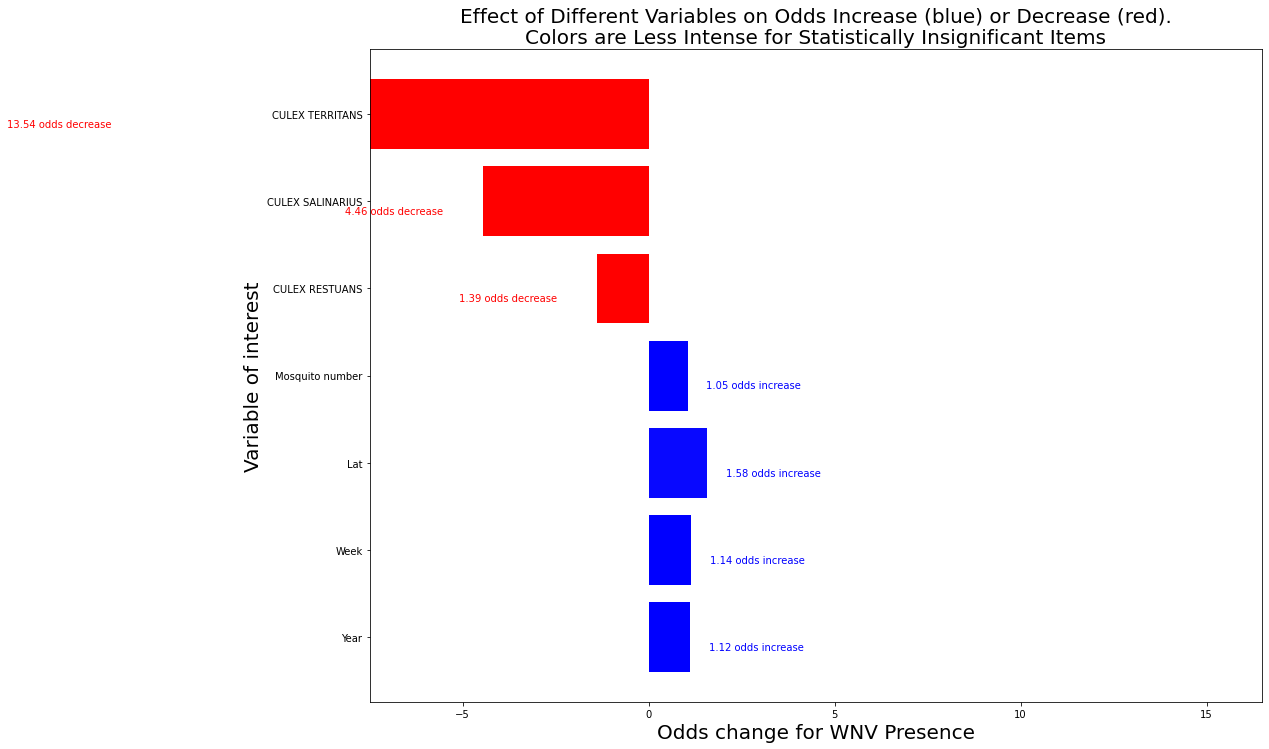

In [657]:
fix, ax = plt.subplots(figsize=(16, 12))
ax.barh(categories, sizes, color=colors)
for index, bar_size in enumerate(sizes):
    if (bar_size > 0.0):
        # Add a label text
        ax.text(bar_size + 0.5, index-0.15, f'{bar_size} odds increase', color='blue')
        
        # Add a p-value disclaimer
        if (p_values[index] >= 0.05):
            ax.text(-2.5, index-0.15, f'p-value={p_values[index]}', color='blue')
    else:
        # Label text
        ax.text(bar_size - 3.7, index-0.15, f'{abs(bar_size)} odds decrease', color='red')
        
        # p-value disclaimer
        if (p_values[index] >= 0.05):
            ax.text(0.3, index - 0.15, f'p-value={p_values[index]}', color='red')

# change the limit to make sure labels go inside the plot area
plt.xlim(-7.5, 16.5)
plt.title("Effect of Different Variables on Odds Increase (blue) or Decrease (red).\
\nColors are Less Intense for Statistically Insignificant Items", size=20)
plt.xlabel("Odds change for WNV Presence", size=20)
plt.ylabel("Variable of interest", size=20)
plt.show()

Our model has an accuracy of 82.525%

| Variable | Coef | 
| --- | --- | 
| const | -249.477732 |
| Year | 0.111365 | 
| Lat | 0.457806 | 
| Week | 0.134790 |  
| Mosquito number | 0.045837 |  
| CULEX RESTUANS | -0.332652 | 
| CULEX SALINARIUS | -1.495237 |
| CULEX TERRITANS | -2.605479 |  

### Results and limitations

1. 4 of the features have coeffiecients positive and four of them have negative coefficient including constant.


2. WNV Prevelance prediction is negatively related to the all the species except CULEX PIPIENS, which has no contribution in the prediction of virus.


3. Mosquito number coefficient is near about zero, for eg, keeping every other feature constant WNV prsence increase by 100% for every 4.5% increase in the mosquito number.


4. WNV Prevalance depends fairly on the geographical location of the mosquitoes. Keeping everything constant, for every 45% variations in the Latitude of the mosquito, chances of it having WNV increases by 100%. 


5. All these results can be resulted out from the odd ratio bar chart from above too.

## THANK YOU